<a href="https://colab.research.google.com/github/Om-soni-15/Gurgaon-Real-Estate-Price-Prediction-Analytics-Platform/blob/master/Notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate Analysis

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Gurgaon_properties_cleaned_v1.csv')

In [4]:
df

Unnamed: 0 property_type                society      sector  price  \
0              0         house       bptp visionnaire   sector 70   5.25   
1              1         house            independent   sector 43   2.10   
2              2         house            independent   sector 54   5.00   
3              3         house            independent   sector 43   3.00   
4              4         house            independent   sector 43   4.50   
...          ...           ...                    ...         ...    ...   
3613        3613          flat       ansal heights 86   sector 86   1.05   
3614        3614          flat  parsvnath green ville   sector 48   3.30   
3615        3615          flat        raheja vedaanta  sector 108   0.95   
3616        3616          flat        ambience lagoon   sector 24   5.80   
3617        3617          flat          dlf the crest   sector 54  11.00   

      price_per_sqft    area  \
0            20115.0  2610.0   
1            38251.0   549.0   
2            43066.0  1161.0   
3            53763.0   558.0   
4            39062.0  1152.0   
...              ...     ...   
3613          5541.0  1895.0   
3614          9984.0  3305.0   
3615          5214.0  1822.0   
3616         12500.0  4640.0   
3617         35222.0  3123.0   

                                           areaWithType  bedRoom  bathroom  \
0                           Plot area 290(242.48 sq.m.)        5         4   
1                                Plot area 61(51 sq.m.)       10        10   
2                           Plot area 129(107.86 sq.m.)       21        21   
3                             Plot area 62(51.84 sq.m.)       12        12   
4                           Plot area 128(107.02 sq.m.)       20        20   
...                                                 ...      ...       ...   
3613             Super Built up area 1895(176.05 sq.m.)        3         3   
3614  Super Built up area 3905(362.79 sq.m.)Built Up...        5         5   
3615             Super Built up area 1822(169.27 sq.m.)        3         3   
3616                 Built Up area: 3700 (343.74 sq.m.)        3         4   
3617             Super Built up area 3123(290.14 sq.m.)        4         6   

      ...  Built_up_area  Carpet_area Super_built_up_area study room  \
0     ...         2609.0          NaN                 NaN          0   
1     ...          549.0          NaN                 NaN          0   
2     ...         1161.0          NaN                 NaN          0   
3     ...          558.0          NaN                 NaN          0   
4     ...         1152.0          NaN                 NaN          0   
...   ...            ...          ...                 ...        ...   
3613  ...            NaN          NaN              1895.0          0   
3614  ...         3305.0          NaN              3905.0          0   
3615  ...            NaN          NaN              1822.0          0   
3616  ...         3700.0          NaN                 NaN          1   
3617  ...            NaN          NaN              3123.0          0   

      servant room  store room  pooja room  others  furnishing_type  \
0                1           0           0       0      unfurnished   
1                1           0           0       0      unfurnished   
2                1           0           0       0    semifurnished   
3                0           0           0       1    semifurnished   
4                1           0           0       0    semifurnished   
...            ...         ...         ...     ...              ...   
3613             1           0           0       0      unfurnished   
3614             1           0           0       0      unfurnished   
3615             0           0           0       1      unfurnished   
3616             1           0           1       1    semifurnished   
3617             1           0           0       0    semifurnished   

      luxury_score  
0               53  
1          

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3614 entries, 0 to 3617
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3614 non-null   object 
 1   society              3613 non-null   object 
 2   sector               3614 non-null   object 
 3   price                3597 non-null   float64
 4   price_per_sqft       3597 non-null   float64
 5   area                 3597 non-null   float64
 6   areaWithType         3614 non-null   object 
 7   bedRoom              3614 non-null   int64  
 8   bathroom             3614 non-null   int64  
 9   balcony              3614 non-null   int64  
 10  floorNum             3595 non-null   float64
 11  facing               2596 non-null   object 
 12  agePossession        3614 non-null   object 
 13  Built_up_area        1646 non-null   float64
 14  Carpet_area          1850 non-null   float64
 15  Super_built_up_area  1870 non-null   float6

<Axes: xlabel='property_type'>

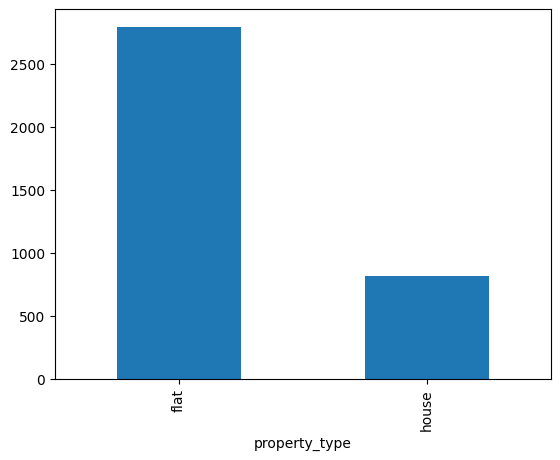

In [8]:
df['property_type'].value_counts().plot(kind='bar')

## Observation
- around 75% properties are flats and 25% are house
- no missing values

In [9]:
df['society'].value_counts()

society
independent                             475
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     41
                                       ... 
uphaar residency 2                        1
the center court                          1
divya apartments                          1
signature global rosellia                 1
nul                                       1
Name: count, Length: 650, dtype: int64

In [10]:
df[(df['society'] != 'independent')]['society'].value_counts(normalize=True).cumsum().head(72)

society
tulip violet                            0.023901
ss the leaf                             0.047164
shapoorji pallonji joyville gurugram    0.060548
dlf new town heights                    0.073614
signature global park                   0.084767
                                          ...   
ramsons kshitij                         0.484704
umang winter hills                      0.488846
ansal heights 86                        0.492989
umang monsoon breeze                    0.497132
the close north                         0.501275
Name: proportion, Length: 72, dtype: float64

In [11]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': np.int64(1),
 'High (50-100)': np.int64(2),
 'Average (10-49)': np.int64(92),
 'Low (2-9)': np.int64(263),
 'Very Low (1)': np.int64(292)}

<Axes: xlabel='society'>

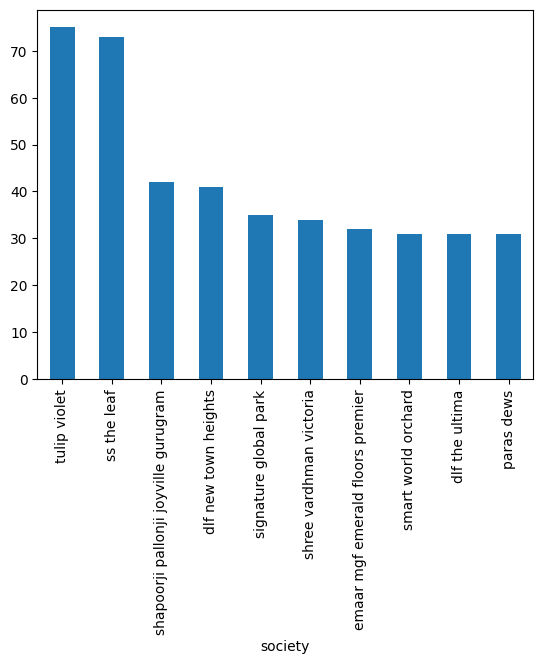

In [12]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [13]:
df['society'].isnull().sum()


np.int64(1)

In [14]:
df[df['society'].isnull()]

property_type society     sector  price  price_per_sqft    area  \
3391          flat     NaN  sector 78    0.6          3692.0  1625.0   

                            areaWithType  bedRoom  bathroom  balcony  ...  \
3391  Built Up area: 1625 (150.97 sq.m.)        2         2        0  ...   

      Built_up_area Carpet_area Super_built_up_area  study room  servant room  \
3391         1625.0         NaN                 NaN           0             0   

      store room  pooja room  others  furnishing_type  luxury_score  
3391           0           0       0      unfurnished             0  

[1 rows x 23 columns]

In [15]:
475/3618*100

13.12880044223328

In [16]:
649-72

577

## Observation
- around 13% property comes under independent tag
- there are 649 societies
- The top 72 properties have 50% properties and rest 50% comes under rest 577 sociesties
  - Very High (>100): Only 1 society has more than 100 listings.
  - High (50-100): 2 societies have between 50 to 100 listings.
  - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
  - Low (2-9): 263 societies have between 2 to 9 listings.
  - Very Low (1): A significant number, 292 societies, have only 1 listing.
- 1 missing value

##Sector

In [17]:
df['sector'].value_counts().shape

(100,)

<Axes: xlabel='sector'>

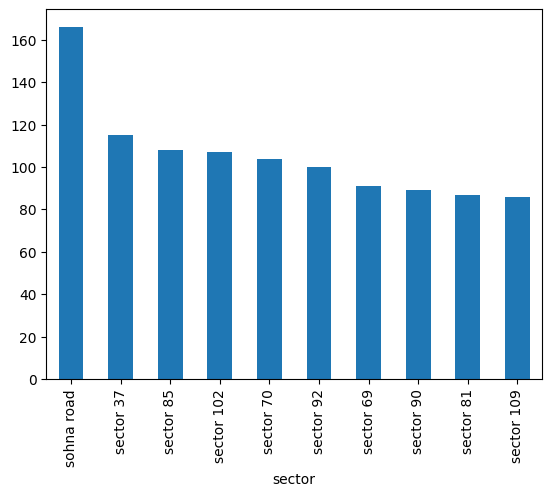

In [18]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [19]:
df['sector'].value_counts(normalize=True).cumsum().head(22)

sector
sohna road    0.045932
sector 37     0.077753
sector 85     0.107637
sector 102    0.137244
sector 70     0.166021
sector 92     0.193691
sector 69     0.218871
sector 90     0.243498
sector 81     0.267571
sector 109    0.291367
sector 65     0.315163
sector 79     0.336193
sector 104    0.355285
sector 33     0.373824
sector 67     0.392363
sector 83     0.410902
sector 43     0.428888
sector 86     0.446597
sector 50     0.464305
sector 95     0.481461
sector 2      0.498340
sector 107    0.514942
Name: proportion, dtype: float64

In [20]:
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': np.int64(5),
 'High (50-100)': np.int64(23),
 'Average (10-49)': np.int64(52),
 'Low (2-9)': np.int64(20),
 'Very Low (1)': np.int64(0)}

- there are 100 different sectors
- top 23 sector contains 50% properties
  - Very High (>100): Only 5 sectors has more than 100 listings.
  - High (50-100): 23 sectors have between 50 to 100 listings.
  - Average (10-49): 52 sectors fall in this range with 10 to 49 listings each.
  - Low (2-9): 20 sectors have between 2 to 9 listings.
  - Very Low (1): no sector has 1 property

## Price

In [21]:
df['price'].value_counts()

price
1.25    79
1.20    63
1.10    62
1.50    62
0.90    62
        ..
4.26     1
2.41     1
2.44     1
7.40     1
3.78     1
Name: count, Length: 470, dtype: int64

In [22]:
df['price'].isnull().sum()

np.int64(17)

In [23]:
df['price'].describe()

count    3597.000000
mean        2.523912
std         2.965571
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='price', ylabel='Count'>

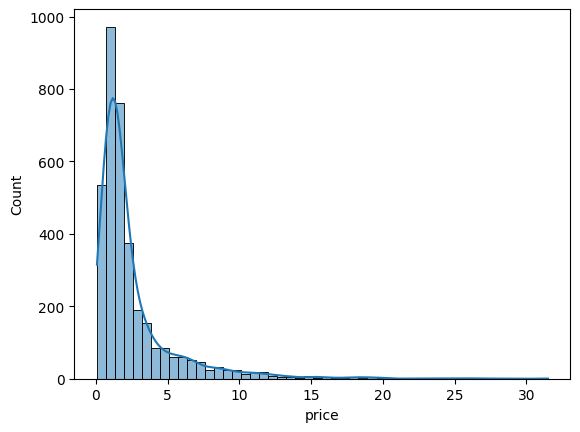

In [25]:

sns.histplot(df['price'],bins=50,kde=True)

In [26]:
df[df['price'] >10].shape

(116, 23)

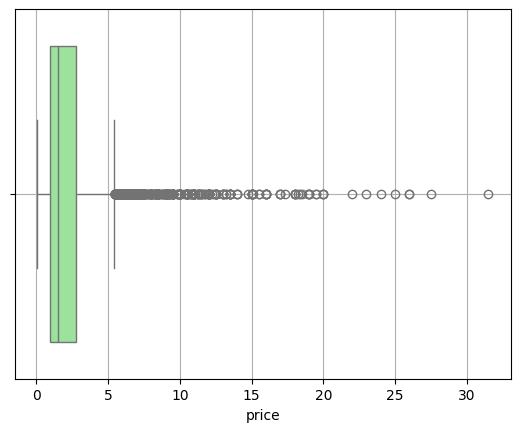

In [27]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()


In [28]:
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.3024224929510577 15.2326938735544


**Skewness**: The price distribution has a skewness of approximately 3.30, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 15.23. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [29]:
df[df['price'] <0.25]

property_type                           society      sector  price  \
180          house                       independent    sector 9   0.22   
186          house                       independent  sohna road   0.07   
371          house  nirmal enclave, maruti kunj road   sector 11   0.24   
917           flat                 hcbs sports ville  sohna road   0.24   
1437          flat                     gls avenue 51   sector 92   0.21   
1929          flat        signature global grand iva  sector 103   0.23   
2076          flat                   ramsons kshitij   sector 95   0.24   
2077          flat                   ramsons kshitij   sector 95   0.17   
2081          flat                        rof ananda   sector 95   0.21   
2082          flat                        rof ananda   sector 95   0.20   
2103          flat                        rof ananda   sector 95   0.20   
2104          flat                        rof ananda   sector 95   0.20   
2672          flat                 hcbs sports ville  sohna road   0.20   
2755          flat                        mvn athens  sohna road   0.24   
2781          flat                   ramsons kshitij   sector 95   0.19   
2785          flat              breez global heights  sohna road   0.21   
2821          flat                 hcbs sports ville  sohna road   0.20   
2851          flat                 hcbs sports ville  sohna road   0.22   
2854          flat                       zara aavaas  sector 104   0.20   
3083          flat             shreeram apartment ii       laxma   0.21   
3108          flat              breez global heights   sector 36   0.24   
3242          flat                       zara aavaas  sector 104   0.22   
3245          flat                       zara aavaas  sector 104   0.20   
3263          flat                        mvn athens  sohna road   0.24   
3342          flat               trisara our homes 3  sohna road   0.21   
3414          flat                        mvn athens  sohna road   0.21   
3424          flat        city shri ram apartments 1  sector 110   0.22   
3469          flat                           my home  sector 110   0.22   
3537          flat                 hcbs sports ville  sohna road   0.22   
3566          flat                   ramsons kshitij   sector 95   0.22   

      price_per_sqft     area  \
180           7407.0    297.0   
186           2525.0    277.0   
371           5333.0    450.0   
917           7407.0    324.0   
1437          6953.0    302.0   
1929          6527.0    352.0   
2076            53.0  45283.0   
2077           544.0   3125.0   
2081            61.0  34426.0   
2082          5463.0    366.0   
2103          5463.0    366.0   
2104          5599.0    357.0   
2672          2666.0    750.0   
2755          4210.0    570.0   
2781           591.0   3215.0   
2785          5329.0    394.0   
2821          4219.0    474.0   
2851          3142.0    700.0   
2854          6645.0    301.0   
3083          4666.0    450.0   
3108          5825.0    412.0   
3242          7302.0    301.0   
3245          6644.0    301.0   
3263          7056.0    340.0   
3342          4339.0    484.0   
3414          4666.0    450.0   
3424          3666.0    600.0   
3469          4400.0    500.0   
3537          4603.0    478.0   
3566          6470.0    340.0   

                                           areaWithType  bedRoom  bathroom  \
180                       Carpet area: 33 (27.59 sq.m.)        2         2   
186                           Plot area 33(27.59 sq.m.)        1         1   
371                          Plot area 450(41.81 sq.m.)        2         2   
917                       Carpet area: 324 (30.1 sq.m.)        1         1   
1437                     Carpet area: 302 (28.06 sq.m.)        1         1   
1929                     Carpet area: 360 (33.45 sq.m.)        1         1   
2076                 Carpet area: 45966 (4270.38 sq.m.)        2         2   
2077                    Carpet 

In [30]:
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.380
0.95     8.500
0.99    15.004
Name: price, dtype: float64

### Quantile Analysis
-  1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.38 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15 crores, indicating that very few properties are priced above this value.

In [31]:
# IQR Range
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(1.8)

In [32]:
# lower bound and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

-1.7500000000000002 5.45


- Descreptive Statistics
  *   There are 17 null price entries
  *   Average price is 2.52 cr
  *   Range of price of property is 7 lac to 31.5 Cr
  *   IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.
  *   Median Price is 1.5 cr


- Visualizations:

  - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
  - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.










In [33]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(416, 23)

In [34]:
outliers

property_type                 society     sector  price  price_per_sqft  \
5            house      emaar mgf marbella  sector 66  12.00         37037.0   
6            house  luxury dlf city floors  sector 26  20.00         48889.0   
7            house             independent  sector 25  10.85         38150.0   
10           house             independent  sector 28   9.00         27778.0   
12           house             independent  sector 26  15.00         33200.0   
...            ...                     ...        ...    ...             ...   
3354          flat          unitech vistas  sector 70   9.00         57507.0   
3468          flat          tulip monsella  sector 53   7.40         33198.0   
3519          flat          vipul belmonte  sector 53   6.50         21922.0   
3616          flat         ambience lagoon  sector 24   5.80         12500.0   
3617          flat           dlf the crest  sector 54  11.00         35222.0   

        area                            areaWithType  bedRoom  bathroom  \
5     3240.0             Plot area 360(301.01 sq.m.)        5         5   
6     4091.0             Plot area 500(418.06 sq.m.)       16        16   
7     2844.0             Plot area 316(264.22 sq.m.)        6         6   
10    3240.0             Plot area 360(301.01 sq.m.)        6         7   
12    4518.0             Plot area 502(419.74 sq.m.)        5         6   
...      ...                                     ...      ...       ...   
3354  1565.0      Built Up area: 1565 (145.39 sq.m.)        3         3   
3468  2229.0        Carpet area: 2229 (207.08 sq.m.)        4         4   
3519  2965.0  Super Built up area 2965(275.46 sq.m.)        3         4   
3616  4640.0      Built Up area: 3700 (343.74 sq.m.)        3         4   
3617  3123.0  Super Built up area 3123(290.14 sq.m.)        4         6   

      balcony  ...  Built_up_area Carpet_area Super_built_up_area  study room  \
5           4  ...         3239.0         NaN                 NaN           0   
6           4  ...         4498.0         NaN                 NaN           0   
7           1  ...         2843.0         NaN                 NaN           0   
10          4  ...         3239.0         NaN                 NaN           1   
12          4  ...         4516.0         NaN                 NaN           1   
...       ...  ...            ...         ...                 ...         ...   
3354        0  ...         1565.0         NaN                 NaN           0   
3468        3  ...            NaN      2229.0                 NaN           0   
3519        4  ...            NaN         NaN              2965.0           1   
3616        4  ...         3700.0         NaN                 NaN           1   
3617        3  ...            NaN         NaN              3123.0           0   

      servant room  store room  pooja room  others  furnishing_type  \
5                1           1           1       0    semifurnished   
6                1           0           0       0        furnished   
7                0           1           0       0      unfurnished   
10               1           1           1       0      unfurnished   
12               1           1           1       0        furnished   
...            ...         ...         ...     ...              ...   
3354             0           0           0       0      unfurnished   
3468             0           0           0       0      unfurnished   
3519             0           0           0       1      unfurnished   
3616             1           0           1       1    semifurnished   
3617             1           0           0       0    semifurnished   

      luxury_score  
5              124  
6               30  
7              157  
10              79  
12              89  
...            ...  
3354             0  
3468            51  
3519            90  
3616            76  
3617           158  

[416 rows x 23 columns]

In [35]:
outliers['price'].describe()

count    416.000000
mean       9.201971
std        4.060423
min        5.460000
25%        6.440000
50%        8.000000
75%       10.607500
max       31.500000
Name: price, dtype: float64

<Axes: xlabel='price'>

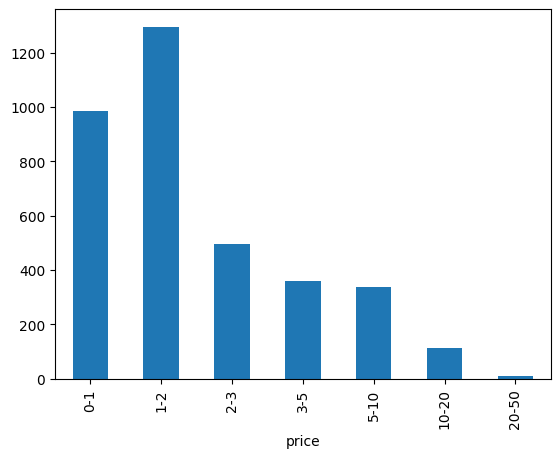

In [36]:
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

<Axes: xlabel='price', ylabel='Proportion'>

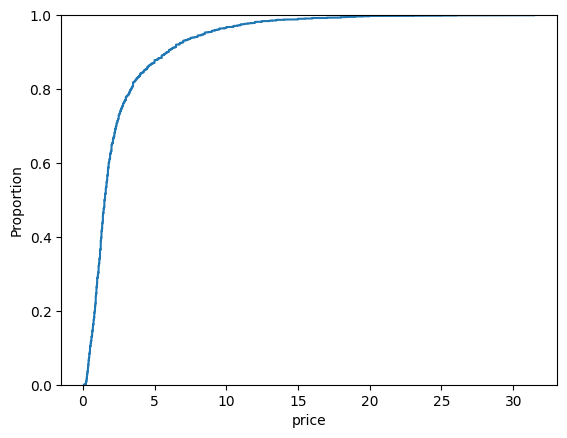

In [37]:
sns.ecdfplot(df['price'])

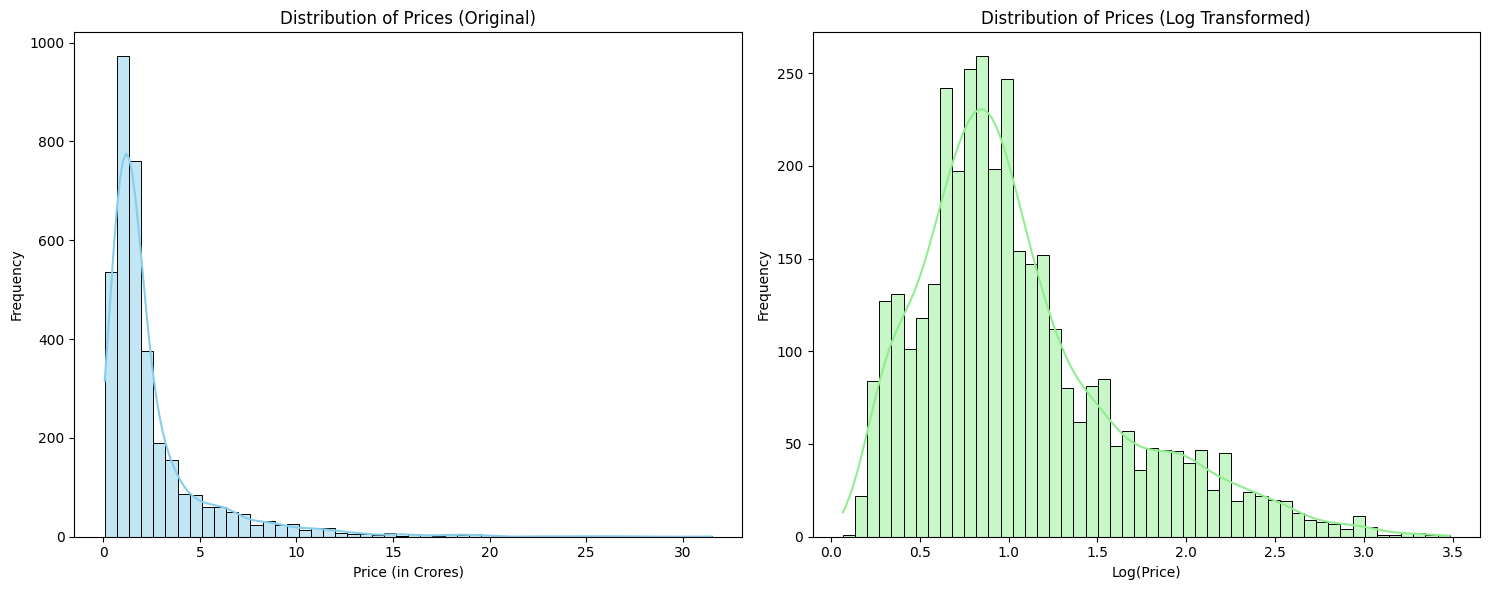

In [38]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [39]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0789639889401805 0.9839819605172475


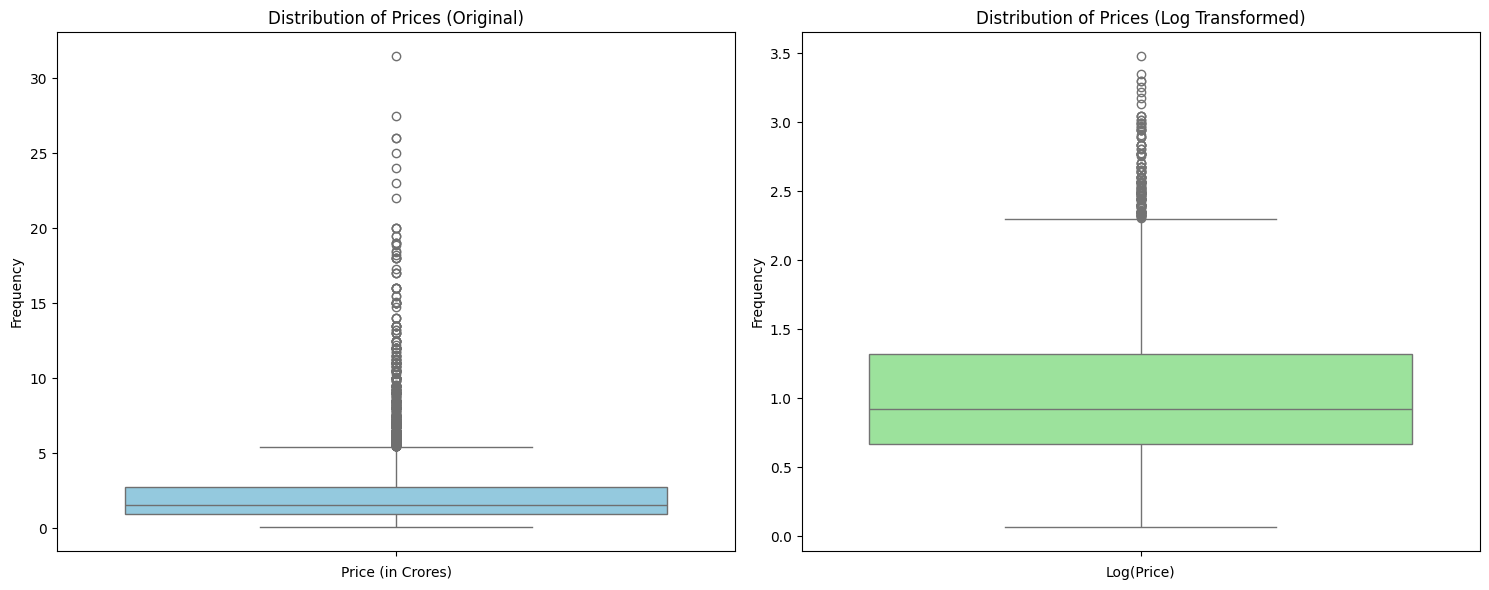

In [40]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Price_per_sqft

In [41]:
df['price_per_sqft'].isnull().sum()

np.int64(17)

In [42]:
df['price_per_sqft'].describe()

count      3597.000000
mean      13914.442869
std       23384.362823
min           4.000000
25%        6818.000000
50%        9007.000000
75%       13837.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

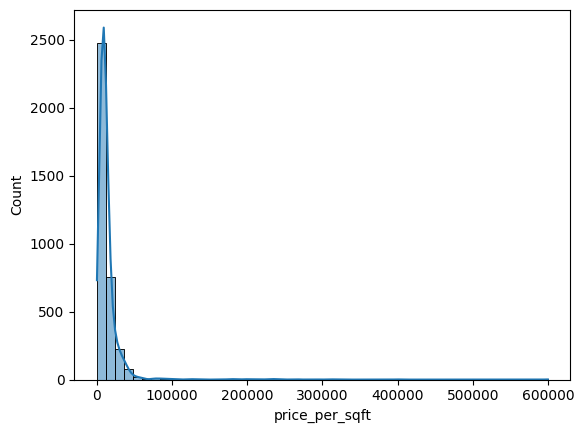

In [43]:
sns.histplot(df['price_per_sqft'],bins=50,kde=True)

In [44]:
df[df['price_per_sqft'] == 4.000000]


property_type            society      sector  price  price_per_sqft  \
3188          flat  hcbs sports ville  sohna road   0.35             4.0   

          area                           areaWithType  bedRoom  bathroom  \
3188  875000.0  Built Up area: 737147 (68483.2 sq.m.)        2         2   

      balcony  ...  Built_up_area Carpet_area Super_built_up_area  study room  \
3188        2  ...       737147.0         NaN                 NaN           0   

      servant room  store room  pooja room  others  furnishing_type  \
3188             0           0           0       0      unfurnished   

      luxury_score  
3188            47  

[1 rows x 23 columns]

<Axes: ylabel='price_per_sqft'>

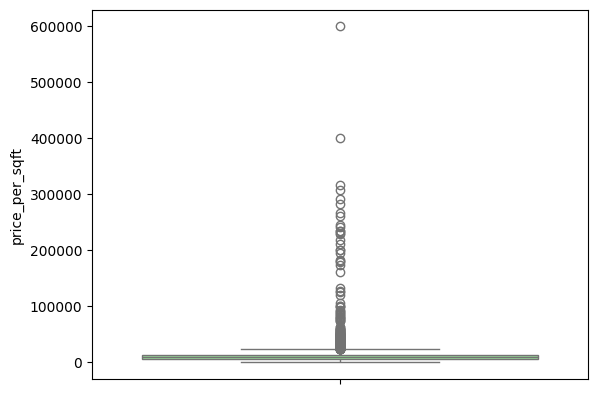

In [45]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')


The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

In [46]:
df['price_per_sqft'].isnull().sum()

np.int64(17)

### Observation
- data is right skewed
- there are 17 null values
- potential outliers


<Axes: xlabel='bedRoom'>

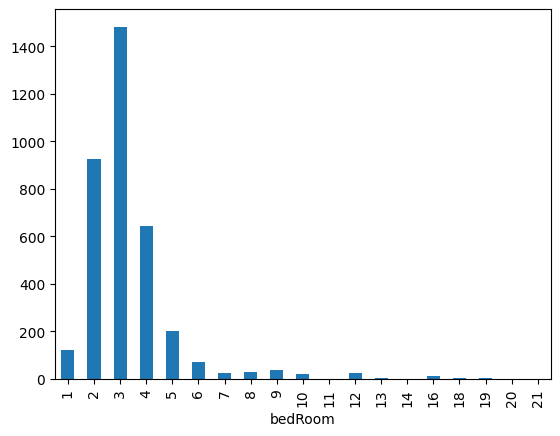

In [47]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

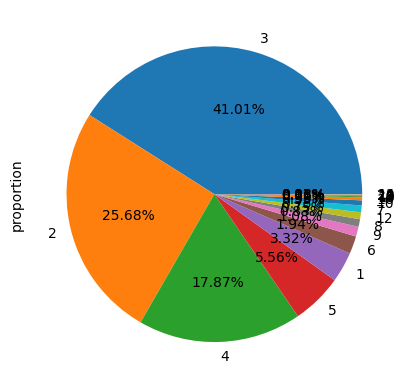

In [48]:
df['bedRoom'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

### Balcony


<Axes: xlabel='balcony'>

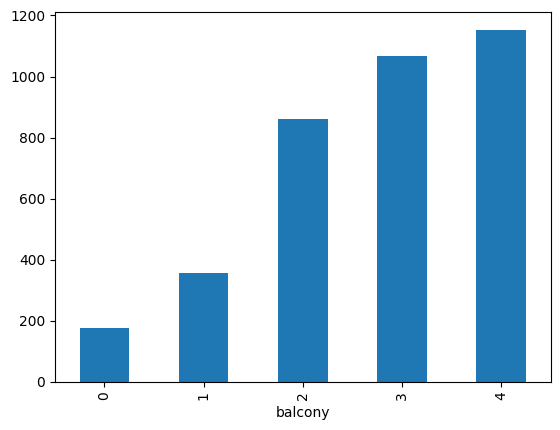

In [49]:
df['balcony'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

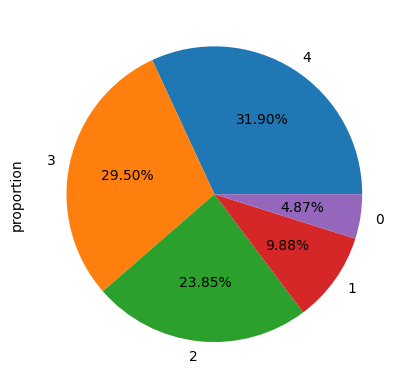

In [50]:
df['balcony'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

### BathRooms


<Axes: xlabel='bathroom'>

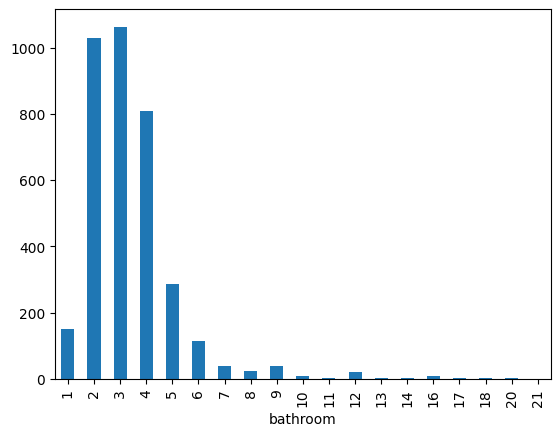

In [51]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

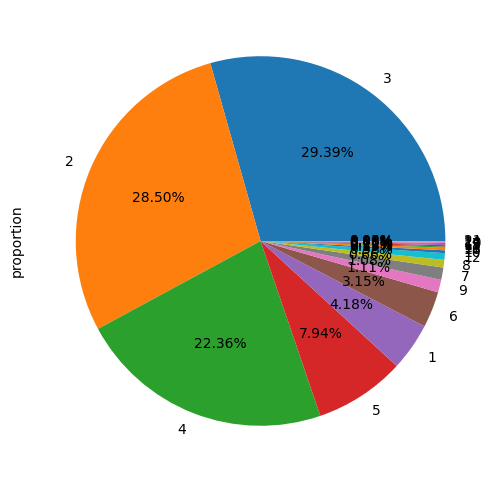

In [52]:
plt.figure(figsize=(15, 6))
df['bathroom'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

### floorNum


In [53]:
df.floorNum.isnull().sum()

np.int64(19)

In [54]:
df.floorNum.describe()

count    3595.000000
mean        6.841168
std         6.008210
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

In [55]:
# show all columns
pd.set_option('display.max_columns', None)

In [56]:
flats=pd.read_csv('/content/flats - flats.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/flats - flats.csv'

In [ ]:
flats['floorNum']=flats['floorNum'].str.split(' ').str.get(0).replace('Ground','0').str.replace('Lower','0').str.replace('Basement','-1').str.extract(r'(-?\d+)')

In [ ]:
import re

In [ ]:
flats[flats.floorNum == '-1']['society'].apply(lambda name: re.sub(r'\d+(\.\d+)?\s?★', '', str(name)).strip()).str.lower()

In [ ]:
df[df['society']=='housing apna enclave']

In [ ]:
temp_df =df[((df['price']==1.3) & (df['society']=='ireo the corridors')) | ((df['society']=='czar mahira homes 63a')& (df['price']==0.42))|((df['society']=='housing apna enclave') & (df['price']== 0.39))]

In [ ]:
df['floorNum'].loc[temp_df.index] =-1

In [ ]:
df.floorNum.isnull().sum()

In [ ]:
df.floorNum.value_counts()

In [ ]:
df.floorNum.describe()

In [ ]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

In [ ]:
sns.boxplot(df['floorNum'], color='lightgreen')


- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

### Facinig


In [57]:
df.facing.isnull().sum()

np.int64(1018)

<Axes: xlabel='facing'>

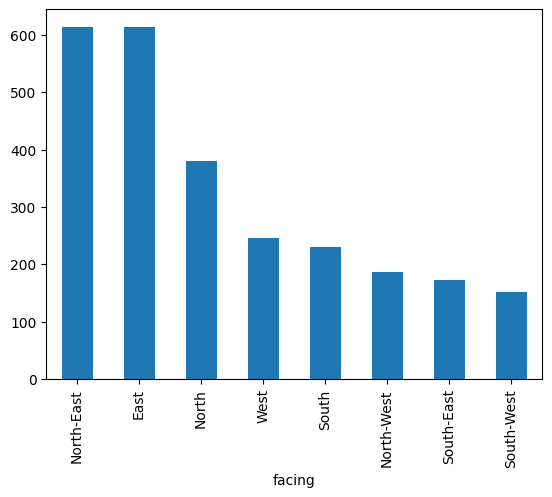

In [58]:
df.facing.value_counts().plot(kind='bar')

In [59]:
df['facing'].fillna('NA',inplace=True)

/tmp/ipython-input-59-3692945726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA',inplace=True)


### AgePossesion

In [60]:
df['agePossession'].isnull().sum()

np.int64(0)

In [61]:
df['agePossession'].value_counts()

agePossession
Relatively New        1633
New Property           579
Moderately Old         556
Undefined              294
Old Property           290
Under Construction     262
Name: count, dtype: int64

### areas

In [62]:
df['Super_built_up_area'].isnull().sum()

np.int64(1744)

In [63]:
df['Built_up_area'].isnull().sum()

np.int64(1968)

In [64]:
df['Carpet_area'].isnull().sum()

np.int64(1764)

In [65]:
df['Super_built_up_area'].describe()

count     1870.000000
mean      1927.050561
std        763.327262
min         89.000000
25%       1480.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: Super_built_up_area, dtype: float64

In [66]:
df['Built_up_area'].describe()

count      1646.000000
mean       2486.333396
std       18287.184228
min          30.000000
25%        1150.000000
50%        1700.000000
75%        2429.000000
max      737147.000000
Name: Built_up_area, dtype: float64

In [67]:
df['Carpet_area'].describe()

count      1850.000000
mean       2544.155696
std       22934.489984
min          15.000000
25%         845.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: Carpet_area, dtype: float64

<Axes: xlabel='Super_built_up_area', ylabel='Count'>

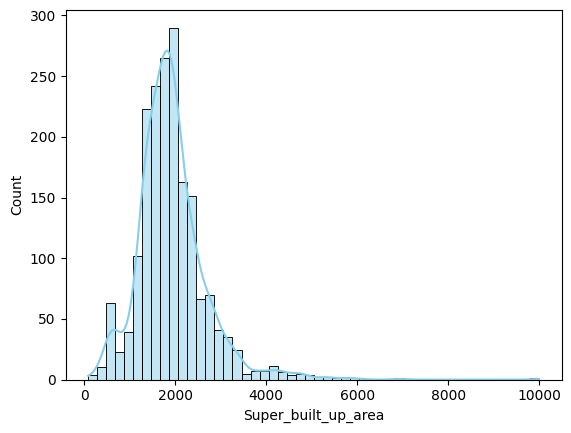

In [68]:
sns.histplot(df['Super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: ylabel='Super_built_up_area'>

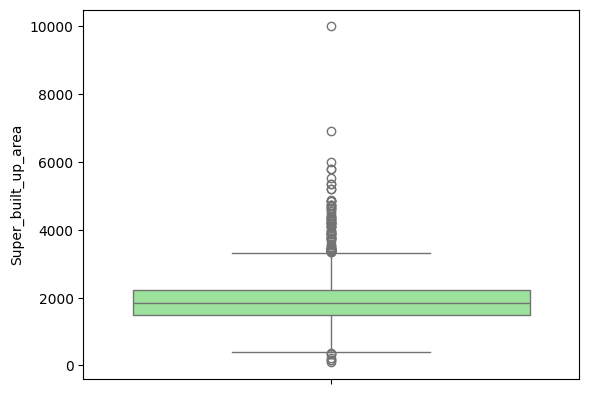

In [69]:
sns.boxplot(df['Super_built_up_area'].dropna(), color='lightgreen')

* Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
* There are a few properties with a significantly larger area, leading to a right-skewed distribution.
* The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
* There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

<Axes: xlabel='Built_up_area', ylabel='Count'>

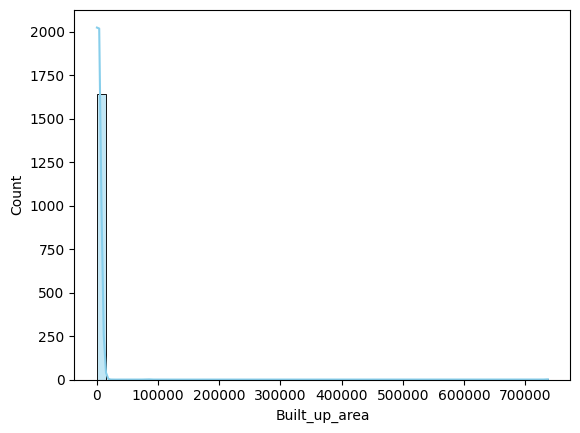

In [70]:
sns.histplot(df['Built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: ylabel='Built_up_area'>

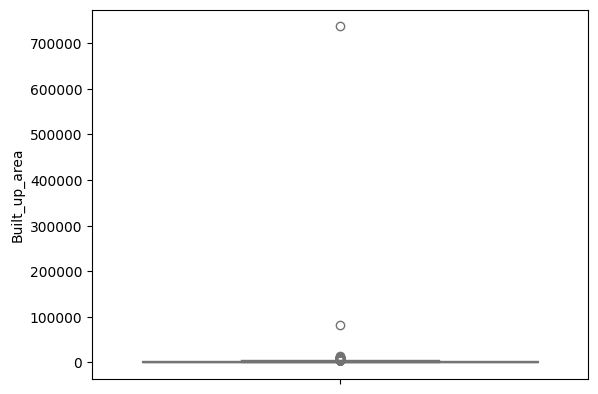

In [71]:
sns.boxplot(df['Built_up_area'].dropna(), color='lightgreen')

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
- The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [72]:
df[df['Built_up_area'] ==737147.000000]


property_type            society      sector  price  price_per_sqft  \
3188          flat  hcbs sports ville  sohna road   0.35             4.0   

          area                           areaWithType  bedRoom  bathroom  \
3188  875000.0  Built Up area: 737147 (68483.2 sq.m.)        2         2   

      balcony  floorNum facing   agePossession  Built_up_area  Carpet_area  \
3188        2       8.0     NA  Relatively New       737147.0          NaN   

      Super_built_up_area  study room  servant room  store room  pooja room  \
3188                  NaN           0             0           0           0   

      others furnishing_type  luxury_score  
3188       0     unfurnished            47

In [73]:
df.drop(df[df['Built_up_area'] ==737147.000000].index,inplace=True)

### Additional Rooms

In [74]:
for i,j in enumerate(['study room','servant room','store room','pooja room','others'], 1):
  print(i,j)

1 study room
2 servant room
3 store room
4 pooja room
5 others


In [75]:
df['study room'].value_counts()

study room
0    2919
1     694
Name: count, dtype: int64

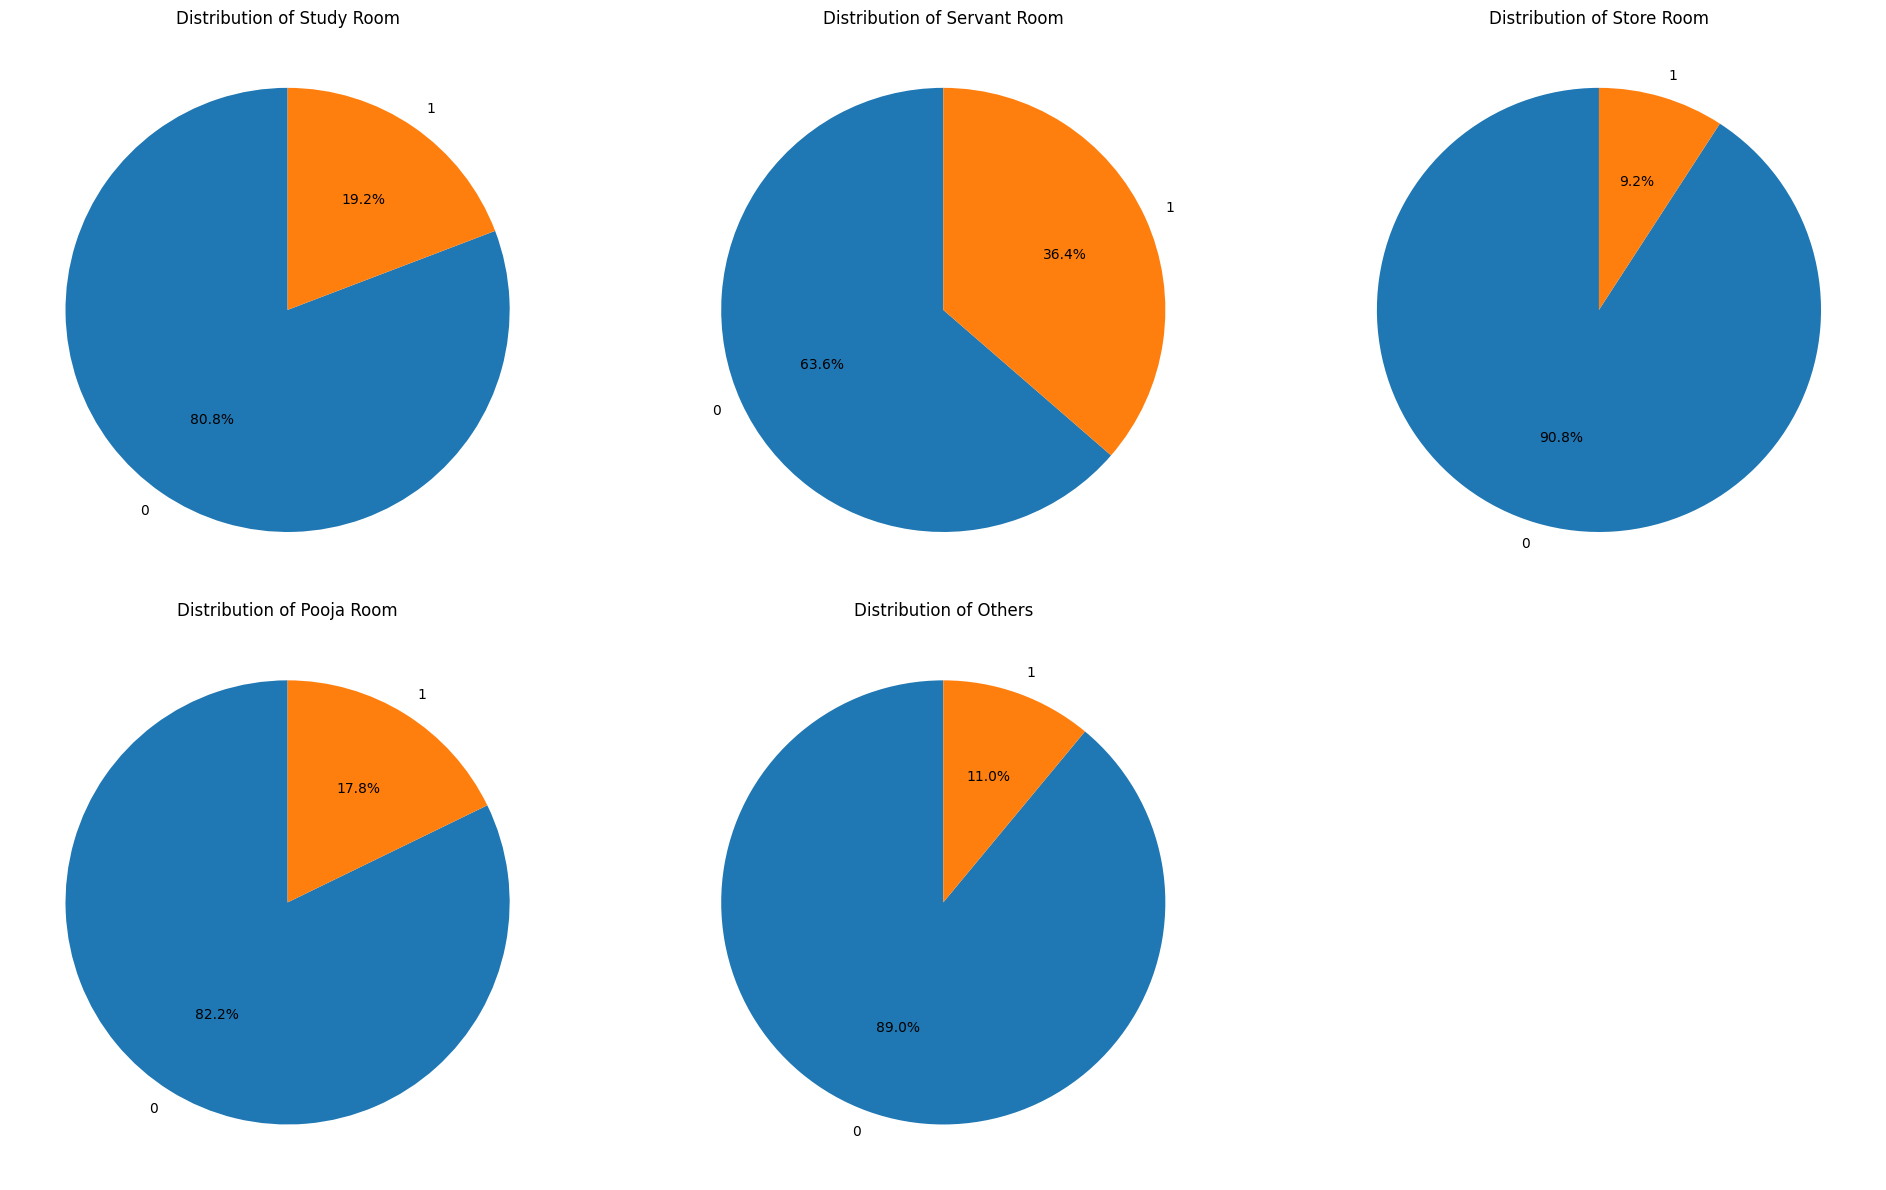

In [76]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### Furnishing Type

In [77]:
df['furnishing_type'].value_counts()

furnishing_type
unfurnished      2594
semifurnished     945
furnished          74
Name: count, dtype: int64

<Axes: ylabel='count'>

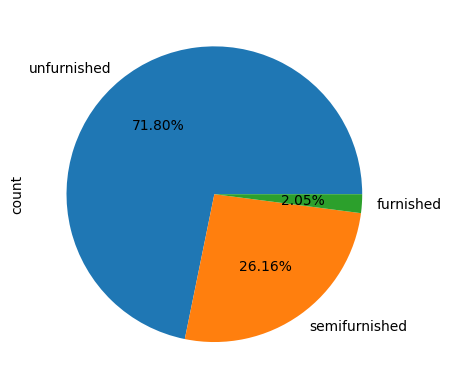

In [78]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

### luxury score

In [79]:
df['luxury_score'].isnull().sum()

np.int64(0)

In [80]:
df['luxury_score'].describe()


count    3613.000000
mean       88.570994
std        66.990886
min         0.000000
25%        40.000000
50%        70.000000
75%       138.000000
max       223.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

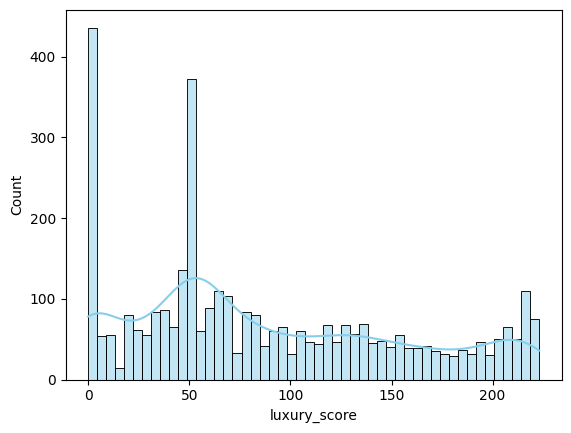

In [81]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

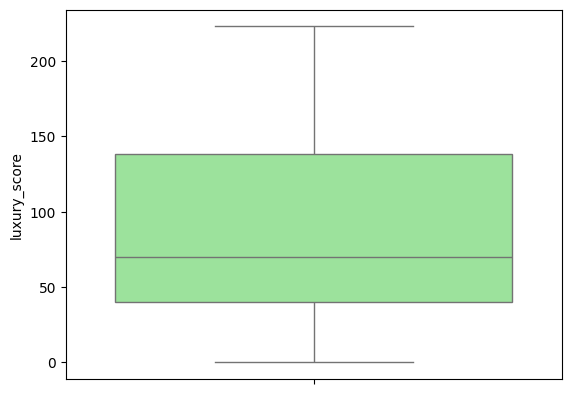

In [82]:
sns.boxplot(df['luxury_score'], color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 130. The interquartile range (IQR) lies between these values.

In [83]:
df.to_csv('Gurgaon_properties_cleaned_v2.csv',index=False)

# Multivariate Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_csv('/content/Gurgaon_properties_cleaned_v2.csv')

In [ ]:
df.head()

property_type           society     sector  price  price_per_sqft    area  \
0         house  bptp visionnaire  sector 70   5.25         20115.0  2610.0   
1         house       independent  sector 43   2.10         38251.0   549.0   
2         house       independent  sector 54   5.00         43066.0  1161.0   
3         house       independent  sector 43   3.00         53763.0   558.0   
4         house       independent  sector 43   4.50         39062.0  1152.0   

                  areaWithType  bedRoom  bathroom  balcony  ...  \
0  Plot area 290(242.48 sq.m.)        5         4        4  ...   
1       Plot area 61(51 sq.m.)       10        10        4  ...   
2  Plot area 129(107.86 sq.m.)       21        21        4  ...   
3    Plot area 62(51.84 sq.m.)       12        12        4  ...   
4  Plot area 128(107.02 sq.m.)       20        20        4  ...   

   Built_up_area Carpet_area Super_built_up_area  study room  servant room  \
0         2609.0         NaN                 NaN           0             1   
1          549.0         NaN                 NaN           0             1   
2         1161.0         NaN                 NaN           0             1   
3          558.0         NaN                 NaN           0             0   
4         1152.0         NaN                 NaN           0             1   

   store room  pooja room  others  furnishing_type  luxury_score  
0           0           0       0      unfurnished            53  
1           0           0       0      unfurnished            26  
2           0           0       0    semifurnished            53  
3           0           0       1    semifurnished            26  
4           0           0       0    semifurnished            26  

[5 rows x 23 columns]

## property_type vs price

<Axes: xlabel='property_type', ylabel='price'>

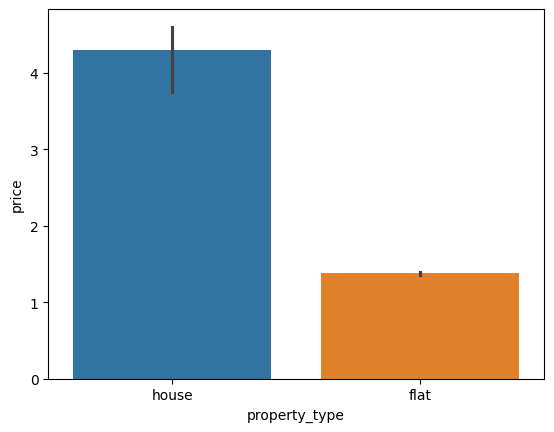

In [ ]:
sns.barplot(x=df['property_type'], y=df['price'], estimator=np.median,hue=df['property_type'])


<Axes: xlabel='property_type', ylabel='price'>

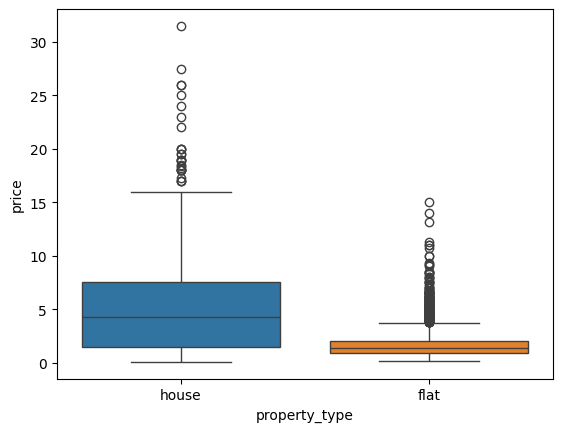

In [ ]:
sns.boxplot(x=df['property_type'], y=df['price'],hue=df['property_type'])

## property_type vs area

<Axes: xlabel='property_type', ylabel='Built_up_area'>

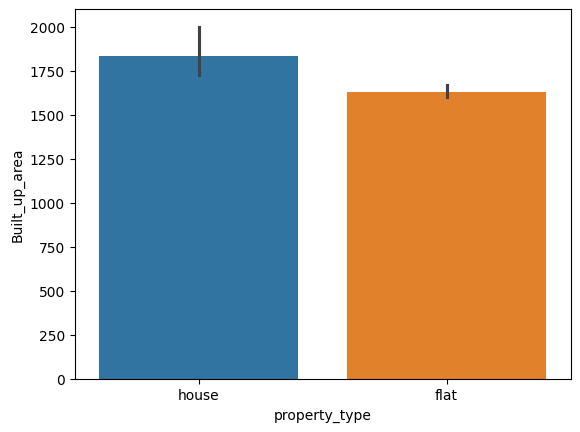

In [ ]:
sns.barplot(x=df['property_type'], y=df['Built_up_area'], estimator=np.median,hue=df['property_type'])


(0.0, 20000.0)

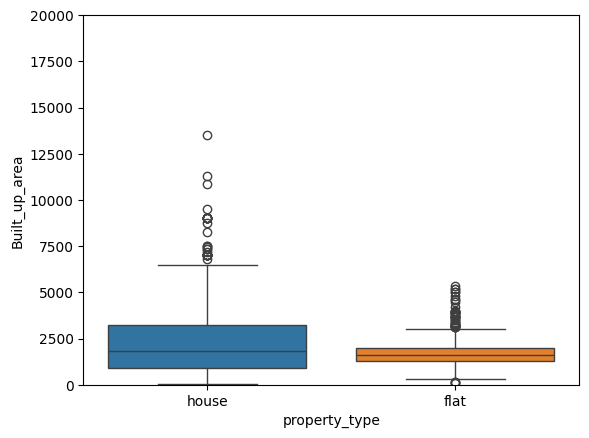

In [ ]:
sns.boxplot(x=df['property_type'], y=df['Built_up_area'],hue=df['property_type'])
plt.ylim(0, 20000)

## property_type vs price_per_sqft


<Axes: xlabel='property_type', ylabel='price_per_sqft'>

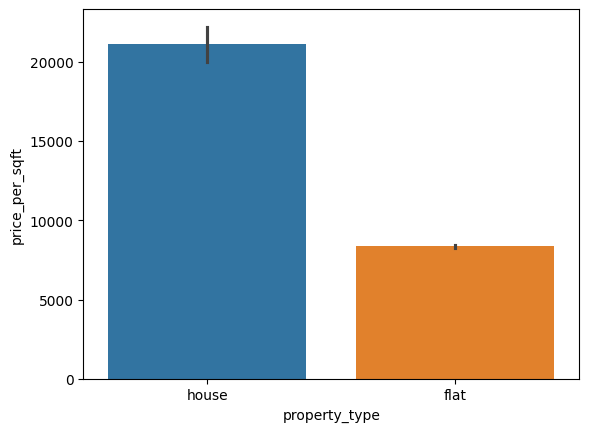

In [ ]:
sns.barplot(x=df['property_type'], y=df['price_per_sqft'], estimator=np.median,hue=df['property_type'])


<Axes: xlabel='property_type', ylabel='price_per_sqft'>

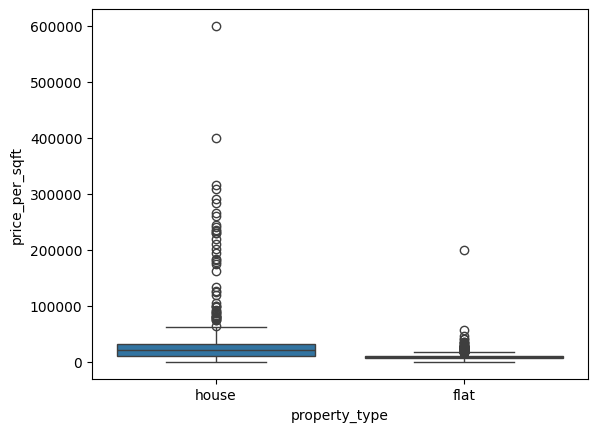

In [ ]:
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'], hue=df['property_type'])


In [ ]:
# check outliers
df[df['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'Super_built_up_area', 'Built_up_area', 'Carpet_area']]

property_type                      society     sector  price  \
164          house                  independent  sector 38   8.00   
200          house         bhim nagar, sector 6   sector 6   0.85   
240          house                  independent  sector 12   3.50   
247          house                dlf the grove  sector 54   5.70   
251          house                    rk excelo  sector 12   0.60   
253          house                  independent  sector 28   4.50   
258          house                  independent  sector 12   6.00   
266          house                  independent      laxma   0.60   
291          house                  independent  sector 24  10.00   
298          house                  independent  sector 17   3.50   
311          house          huda plot sector 38  sector 38   4.30   
317          house                   ardee city  sector 52   5.50   
364          house     unitech uniworld resorts  sector 33  10.00   
430          house                        ansal  sector 43   1.85   
471          house       emaar the palm springs  sector 54  24.00   
483          house                  independent  sector 55   1.45   
489          house            vatika india next  sector 82   7.00   
508          house       dlf city plots phase 2  sector 25  10.00   
520          house       dlf city plots phase 2  sector 25  10.50   
521          house         eros rosewood villas  sector 49   2.75   
565          house       unitech deerwood chase  sector 50   8.45   
577          house                  independent  sector 23   2.80   
587          house           vipul tatvam villa  sector 48   7.25   
695          house  unitech nirvana birch court  sector 50   7.10   
707          house     unitech uniworld resorts  sector 33   9.50   
730          house                  independent  sector 54   3.75   
750          house               uppal southend  sector 49   6.75   
767          house                  independent  sector 57   8.00   
3298          flat           ambience caitriona  sector 24  14.00   

      price_per_sqft   area  \
164         230547.0  347.0   
200         126865.0   67.0   
240         133079.0  263.0   
247         211111.0  270.0   
251         120000.0   50.0   
253         125000.0  360.0   
258         315789.0  190.0   
266         105263.0   57.0   
291         229885.0  435.0   
298         218750.0  160.0   
311         245398.0  175.0   
317         183333.0  300.0   
364         181818.0  550.0   
430         308333.0   60.0   
471         600000.0  400.0   
483         241666.0   60.0   
489         194444.0  360.0   
508         400000.0  250.0   
520         261194.0  402.0   
521         178571.0  154.0   
565         235376.0  359.0   
577         161849.0  173.0   
587         201388.0  360.0   
695         283333.0  251.0   
707         173992.0  546.0   
730         234375.0  160.0   
750         290948.0  232.0   
767         266666.0  300.0   
3298        200000.0  700.0   

                                           areaWithType  Super_built_up_area  \
164   Built Up area: 347 (32.24 sq.m.)Carpet area: 2...                  NaN   
200                            Plot area 67(6.22 sq.m.)                  NaN   
240   Plot area 263(24.43 sq.m.)Built Up area: 4800 ...                  NaN   
247                    Built Up area: 270 (25.08 sq.m.)                  NaN   
251   Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...                  NaN   
253                    Built Up area: 360 (33.45 sq.m.)                  NaN   
258   Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...                  NaN   
266                             Plot area 57(5.3 sq.m.)                  NaN   
291                      Carpet area: 435 (40.41 sq.m.)                  NaN   
298                    Built Up area: 160 (14.86 sq.m.)                  NaN   
311   Plot area 163(15.14 sq.m.)Built Up area: 145 s...                  NaN   
317                          Plot area 300(

<Axes: xlabel='bedRoom', ylabel='property_type'>

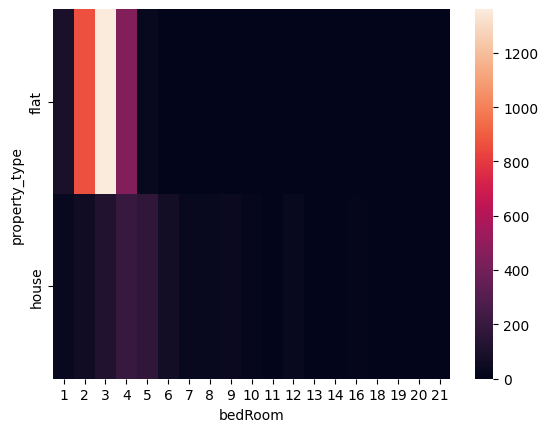

In [ ]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))


In [ ]:
# checking outliers
df[df['bedRoom'] >= 10]

property_type                 society     sector  price  price_per_sqft  \
1           house             independent  sector 43   2.10         38251.0   
2           house             independent  sector 54   5.00         43066.0   
3           house             independent  sector 43   3.00         53763.0   
4           house             independent  sector 43   4.50         39062.0   
6           house  luxury dlf city floors  sector 26  20.00         48889.0   
..            ...                     ...        ...    ...             ...   
762         house          uppal southend  sector 49   6.75         32328.0   
771         house             independent  sector 28  11.00         33951.0   
790         house             independent  sector 28  12.50         51440.0   
795         house        dlf city phase 1  sector 26   9.25         47803.0   
797         house             independent  sector 47   6.09         33665.0   

       area                                       areaWithType  bedRoom  \
1     549.0                             Plot area 61(51 sq.m.)       10   
2    1161.0                        Plot area 129(107.86 sq.m.)       21   
3     558.0                          Plot area 62(51.84 sq.m.)       12   
4    1152.0                        Plot area 128(107.02 sq.m.)       20   
6    4091.0                        Plot area 500(418.06 sq.m.)       16   
..      ...                                                ...      ...   
762  2088.0                        Plot area 232(193.98 sq.m.)       12   
771  3240.0                        Plot area 360(301.01 sq.m.)       13   
790  2430.0                        Plot area 270(225.75 sq.m.)       16   
795  1935.0  Plot area 1935(179.77 sq.m.)Built Up area: 700...       12   
797  1809.0  Plot area 201(168.06 sq.m.)Built Up area: 180 ...       12   

     bathroom  balcony  ...  Built_up_area Carpet_area Super_built_up_area  \
1          10        4  ...          549.0         NaN                 NaN   
2          21        4  ...         1161.0         NaN                 NaN   
3          12        4  ...          558.0         NaN                 NaN   
4          20        4  ...         1152.0         NaN                 NaN   
6          16        4  ...         4498.0         NaN                 NaN   
..        ...      ...  ...            ...         ...                 ...   
762        12        4  ...         2087.0         NaN                 NaN   
771        13        4  ...         3239.0         NaN                 NaN   
790        17        4  ...         2429.0         NaN                 NaN   
795        12        4  ...         7000.0         NaN                 NaN   
797        11        4  ...          180.0       150.0                 NaN   

     study room  servant room  store room  pooja room  others  \
1             0             1           0           0       0   
2             0             1           0           0       0   
3             0             0           0           0       1   
4             0             1           0           0       0   
6             0             1           0           0       0   
..          ...           ...         ...         ...     ...   
762           1             1           0           1       1   
771           1             1           0           1       0   
790           1             1           0           1       1   
795           0             1           0           1       0   
797           0             0           0           1       0   

     furnishing_type  luxury_score  
1        unfurnished            26  
2      semifurnished            53  
3      semifurnished            26  
4      semifurnished            26  
6          furnished            30  
..               ...           ...  
762        furnished            53  
771        furnished           115  
790    semifurnished           160  
795    semifurnished            46  
797    semifurnished         

<Axes: xlabel='property_type', ylabel='floorNum'>

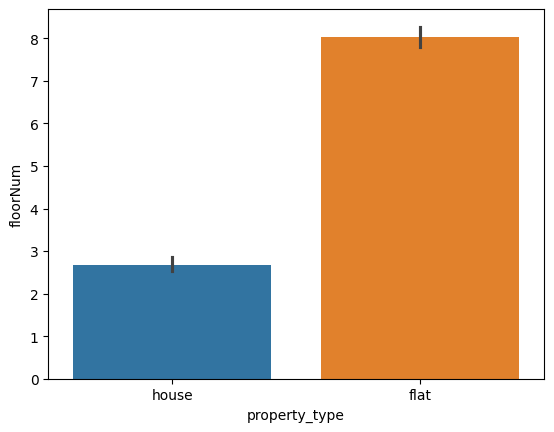

In [ ]:
sns.barplot(x=df['property_type'],y=df['floorNum'],hue=df['property_type'])


<Axes: xlabel='property_type', ylabel='floorNum'>

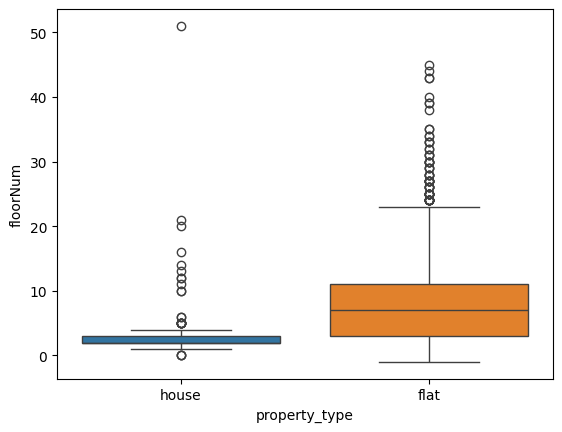

In [ ]:
sns.boxplot(x=df['property_type'],y=df['floorNum'],hue=df['property_type'])


In [ ]:
# checking for a outliers
df[(df['property_type'] == 'house') & (df['floorNum'] > 10)]


property_type                  society      sector  price  price_per_sqft  \
146         house              spaze privy   sector 72   3.10          8486.0   
170         house           ats tourmaline  sector 109   1.87          8697.0   
217         house              independent   sector 92   1.80          7627.0   
319         house  indiabulls centrum park  sector 103   3.25          8125.0   
382         house              spaze privy   sector 72   3.09          6981.0   
383         house      satya the hermitage  sector 103   3.15          6702.0   
420         house         suncity township   sector 54   2.00         30968.0   
524         house      ireo victory valley   sector 67   8.00         22222.0   
625         house   vatika the seven lamps   sector 82   1.60          6597.0   

       area                                       areaWithType  bedRoom  \
146  3653.0                       Plot area 3653(339.37 sq.m.)        5   
170  2150.0                 Built Up area: 2150 (199.74 sq.m.)        3   
217  2360.0                 Built Up area: 2360 (219.25 sq.m.)        4   
319  4000.0                       Plot area 4000(371.61 sq.m.)        4   
382  4426.0  Built Up area: 3653 (339.37 sq.m.)Carpet area:...        5   
383  4700.0                 Built Up area: 4700 (436.64 sq.m.)        4   
420   646.0  Plot area 60Built Up area: 60 sq.m.Carpet area...        9   
524  3600.0                        Plot area 400(334.45 sq.m.)        6   
625  2425.0                       Plot area 2425(225.29 sq.m.)        4   

     bathroom  balcony  ...  Built_up_area Carpet_area Super_built_up_area  \
146         5        4  ...         3652.0         NaN                 NaN   
170         4        0  ...         2150.0         NaN                 NaN   
217         5        0  ...         2360.0         NaN                 NaN   
319         3        4  ...         3999.0         NaN                 NaN   
382         5        4  ...         3653.0      2922.0                 NaN   
383         5        0  ...         4700.0         NaN                 NaN   
420         9        3  ...           60.0        59.0                 NaN   
524         7        4  ...         3599.0         NaN                 NaN   
625         4        4  ...         2424.0         NaN                 NaN   

     study room  servant room  store room  pooja room  others  \
146           0             0           0           0       0   
170           0             0           0           0       0   
217           0             0           0           0       0   
319           0             0           0           0       0   
382           0             1           0           0       0   
383           0             0           0           0       0   
420           0             1           0           0       0   
524           1             1           0           1       0   
625           0             1           0           0       0   

     furnishing_type  luxury_score  
146      unfurnished             0  
170      unfurnished             0  
217      unfurnished             0  
319      unfurnished            52  
382      unfurnished            45  
383      unfurnished            61  
420    semifurnished             7  
524        furnished            53  
625      unfurnished           107  

[9 rows x 23 columns]

In [ ]:
# conclusion houses(Villa) in appratment

<Axes: xlabel='agePossession', ylabel='property_type'>

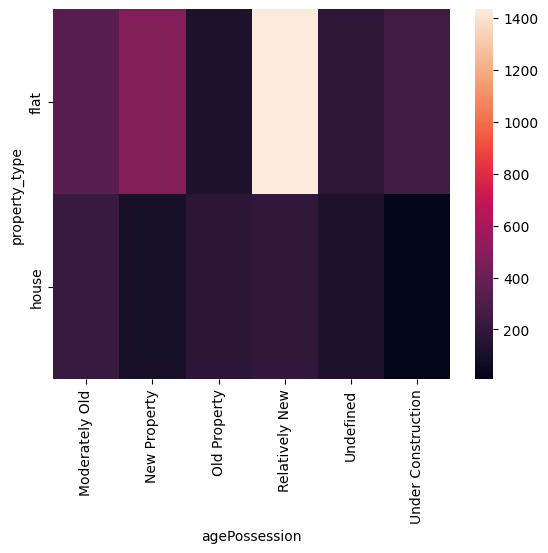

In [ ]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))

<Axes: xlabel='agePossession', ylabel='property_type'>

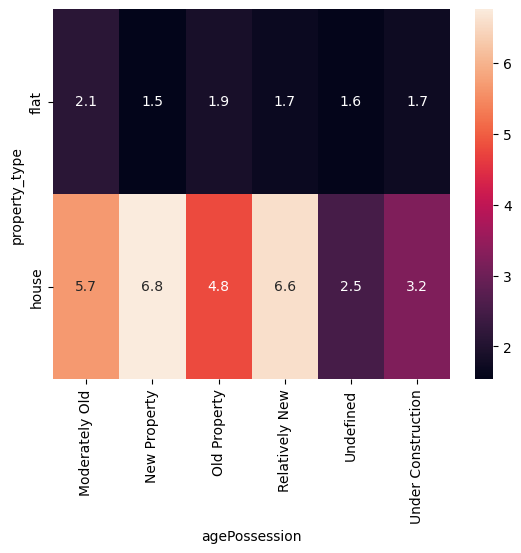

In [ ]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='agePossession',values='price',aggfunc='mean'),annot=True)


<Axes: xlabel='bedRoom', ylabel='property_type'>

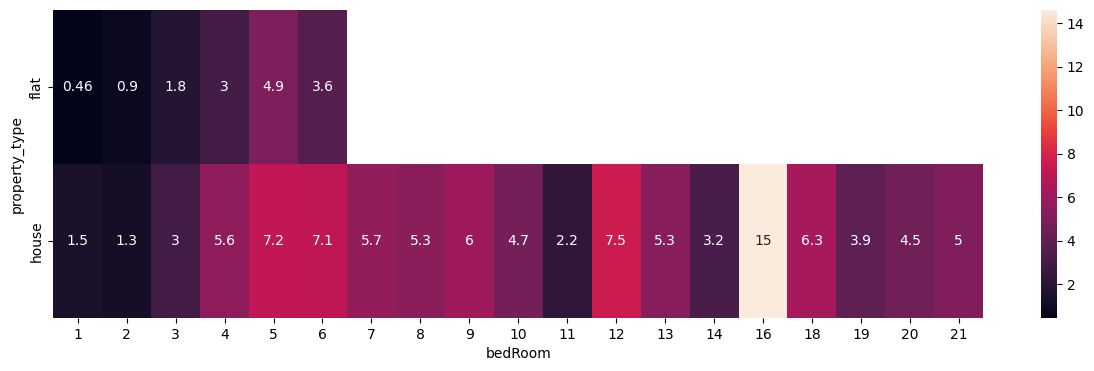

In [ ]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)

<Axes: xlabel='furnishing_type', ylabel='property_type'>

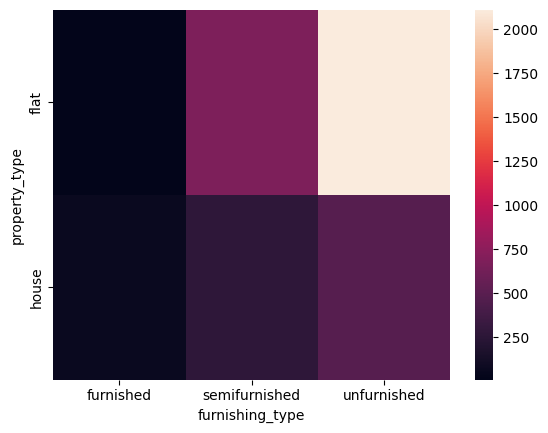

In [ ]:
sns.heatmap(pd.crosstab(df['property_type'],df['furnishing_type']))

<Axes: xlabel='furnishing_type', ylabel='property_type'>

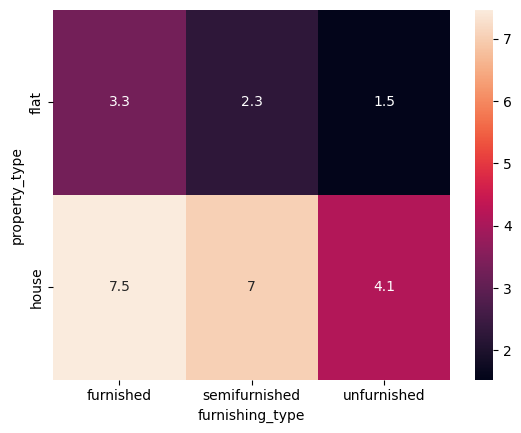

In [ ]:
# plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)

<Axes: xlabel='property_type', ylabel='luxury_score'>

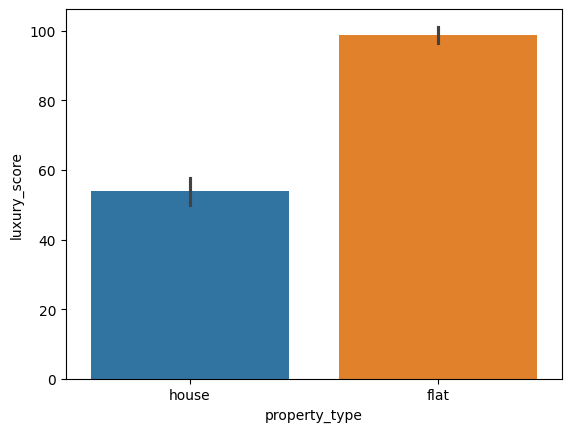

In [ ]:
sns.barplot(x=df['property_type'],y=df['luxury_score'],hue=df['property_type'])

In [ ]:
# luxary score of house is less than flat

In [ ]:
flat_df=df[df['property_type']== 'flat']

<Axes: xlabel='price', ylabel='luxury_score'>

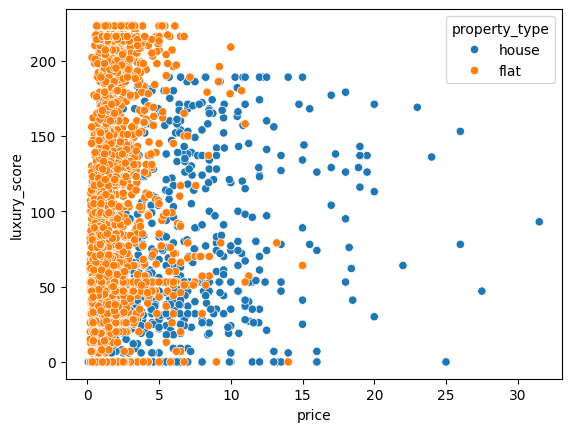

In [ ]:
sns.scatterplot(x=df['price'],y=df['luxury_score'],hue=df['property_type'])

In [ ]:
df.head()

property_type           society     sector  price  price_per_sqft    area  \
0         house  bptp visionnaire  sector 70   5.25         20115.0  2610.0   
1         house       independent  sector 43   2.10         38251.0   549.0   
2         house       independent  sector 54   5.00         43066.0  1161.0   
3         house       independent  sector 43   3.00         53763.0   558.0   
4         house       independent  sector 43   4.50         39062.0  1152.0   

                  areaWithType  bedRoom  bathroom  balcony  ...  \
0  Plot area 290(242.48 sq.m.)        5         4        4  ...   
1       Plot area 61(51 sq.m.)       10        10        4  ...   
2  Plot area 129(107.86 sq.m.)       21        21        4  ...   
3    Plot area 62(51.84 sq.m.)       12        12        4  ...   
4  Plot area 128(107.02 sq.m.)       20        20        4  ...   

   Built_up_area Carpet_area Super_built_up_area  study room  servant room  \
0         2609.0         NaN                 NaN           0             1   
1          549.0         NaN                 NaN           0             1   
2         1161.0         NaN                 NaN           0             1   
3          558.0         NaN                 NaN           0             0   
4         1152.0         NaN                 NaN           0             1   

   store room  pooja room  others  furnishing_type  luxury_score  
0           0           0       0      unfurnished            53  
1           0           0       0      unfurnished            26  
2           0           0       0    semifurnished            53  
3           0           0       1    semifurnished            26  
4           0           0       0    semifurnished            26  

[5 rows x 23 columns]

<Axes: xlabel='agePossession', ylabel='luxury_score'>

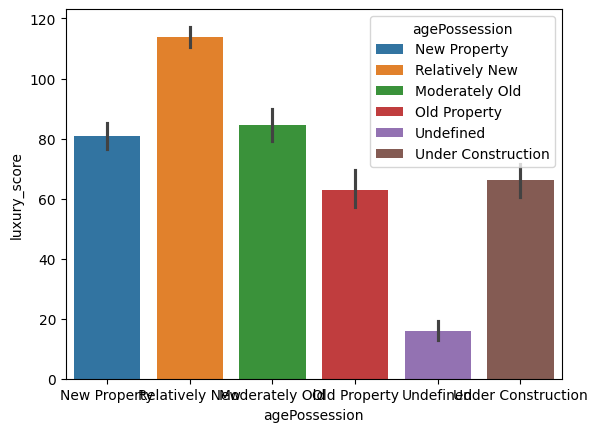

In [ ]:
## luxury score vs  agePossesion
sns.barplot(x=df['agePossession'],y=df['luxury_score'],hue=df['agePossession'],legend=True)


<Axes: xlabel='sector', ylabel='property_type'>

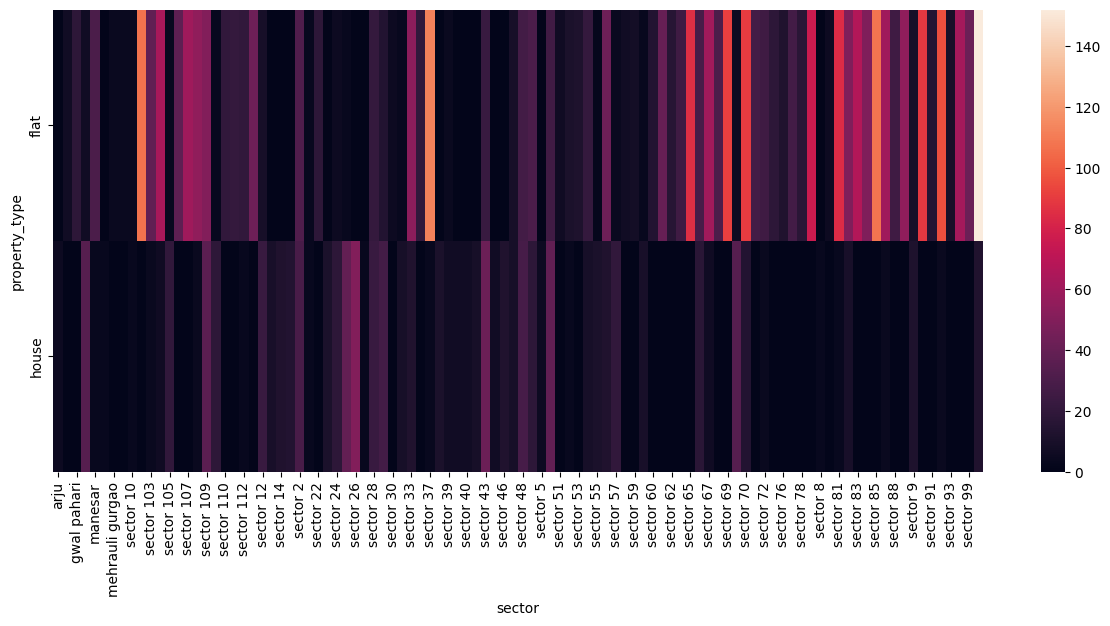

In [ ]:
# sector analysis
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['property_type'],df['sector'].sort_index()))

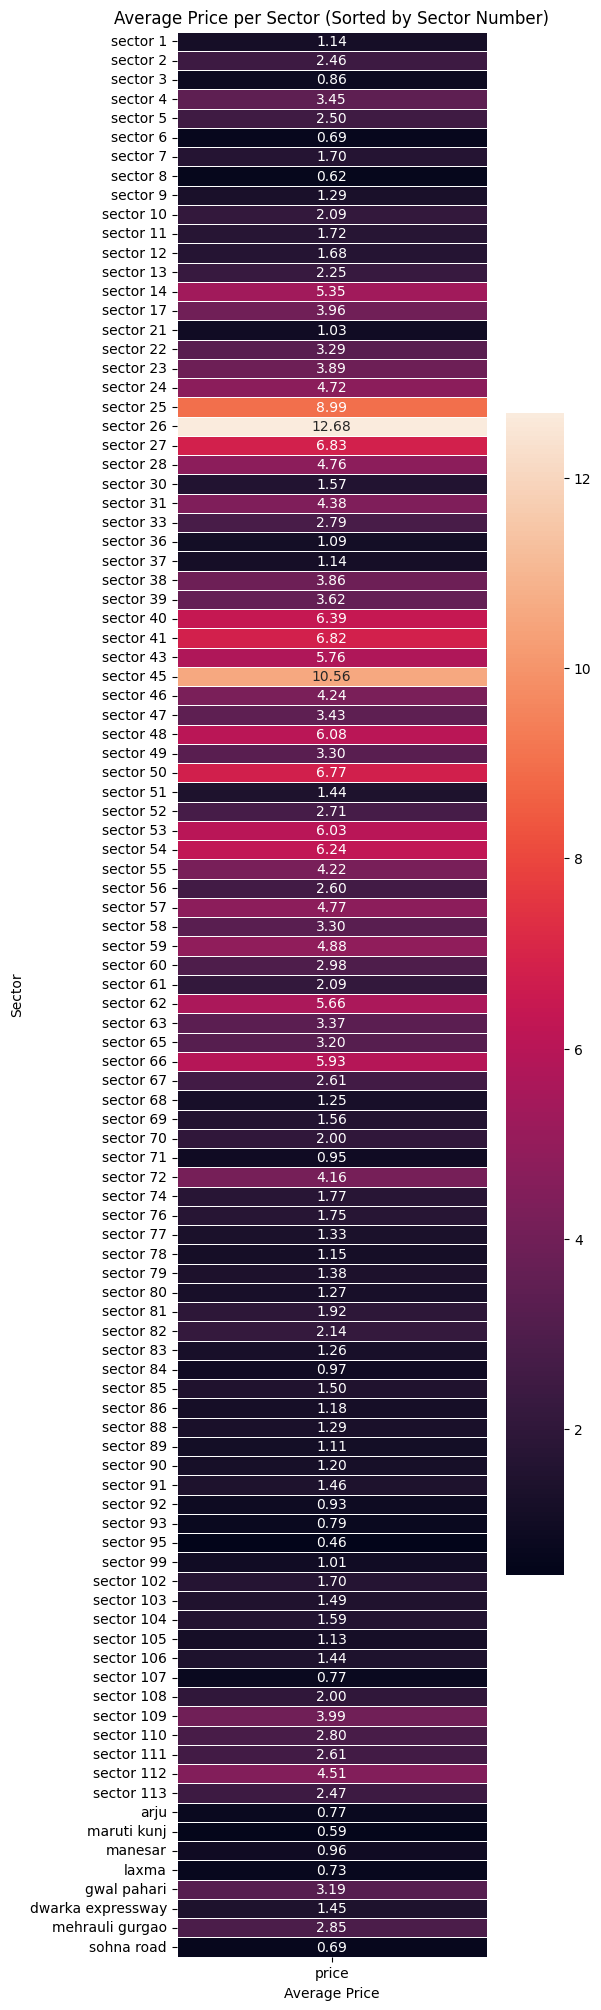

In [ ]:
# sector analysis
import re
# Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

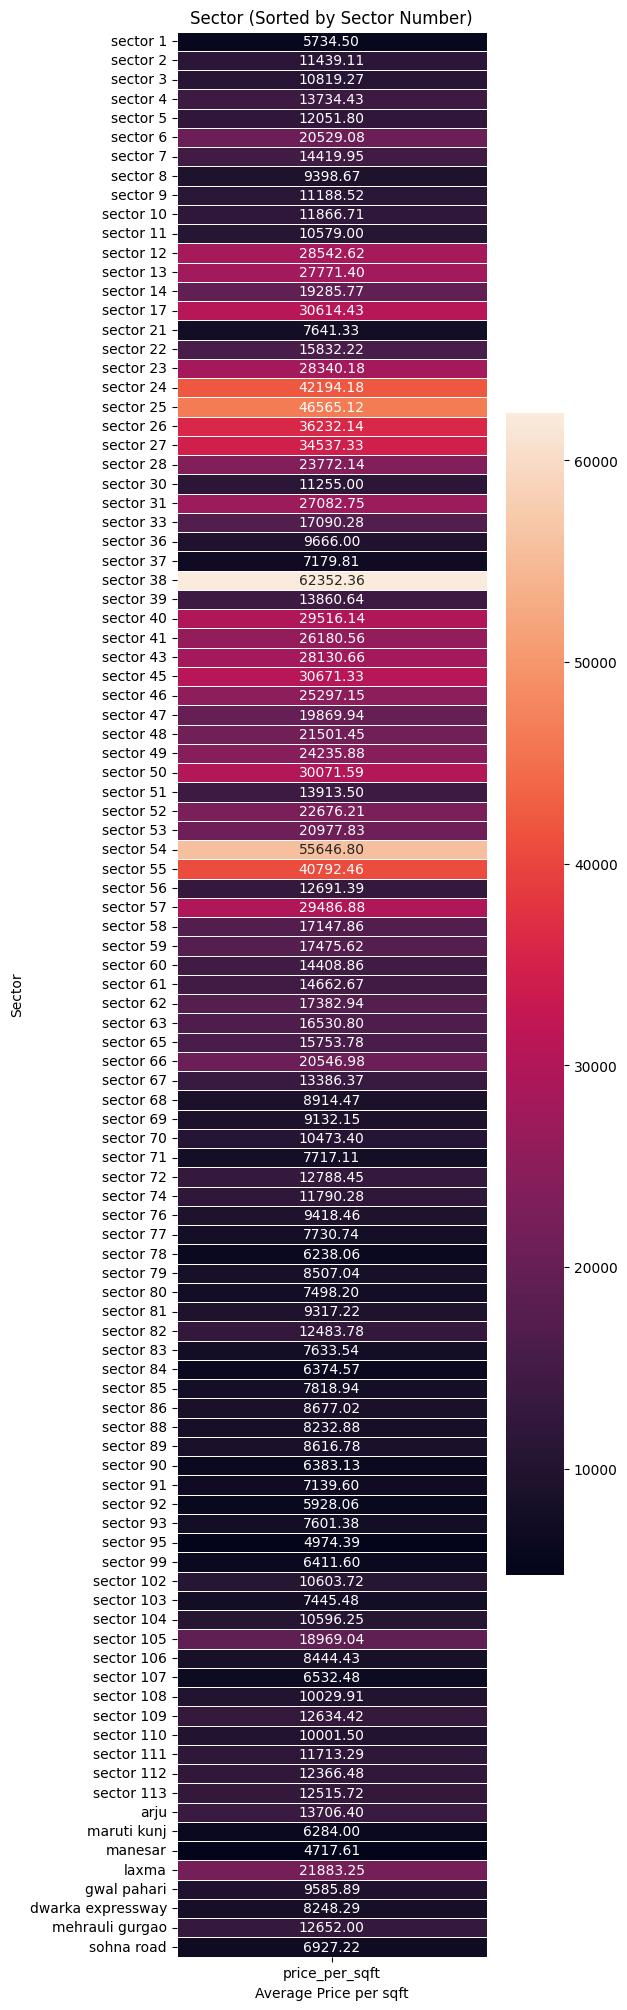

In [ ]:
# sector vs price_per_Sqft
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

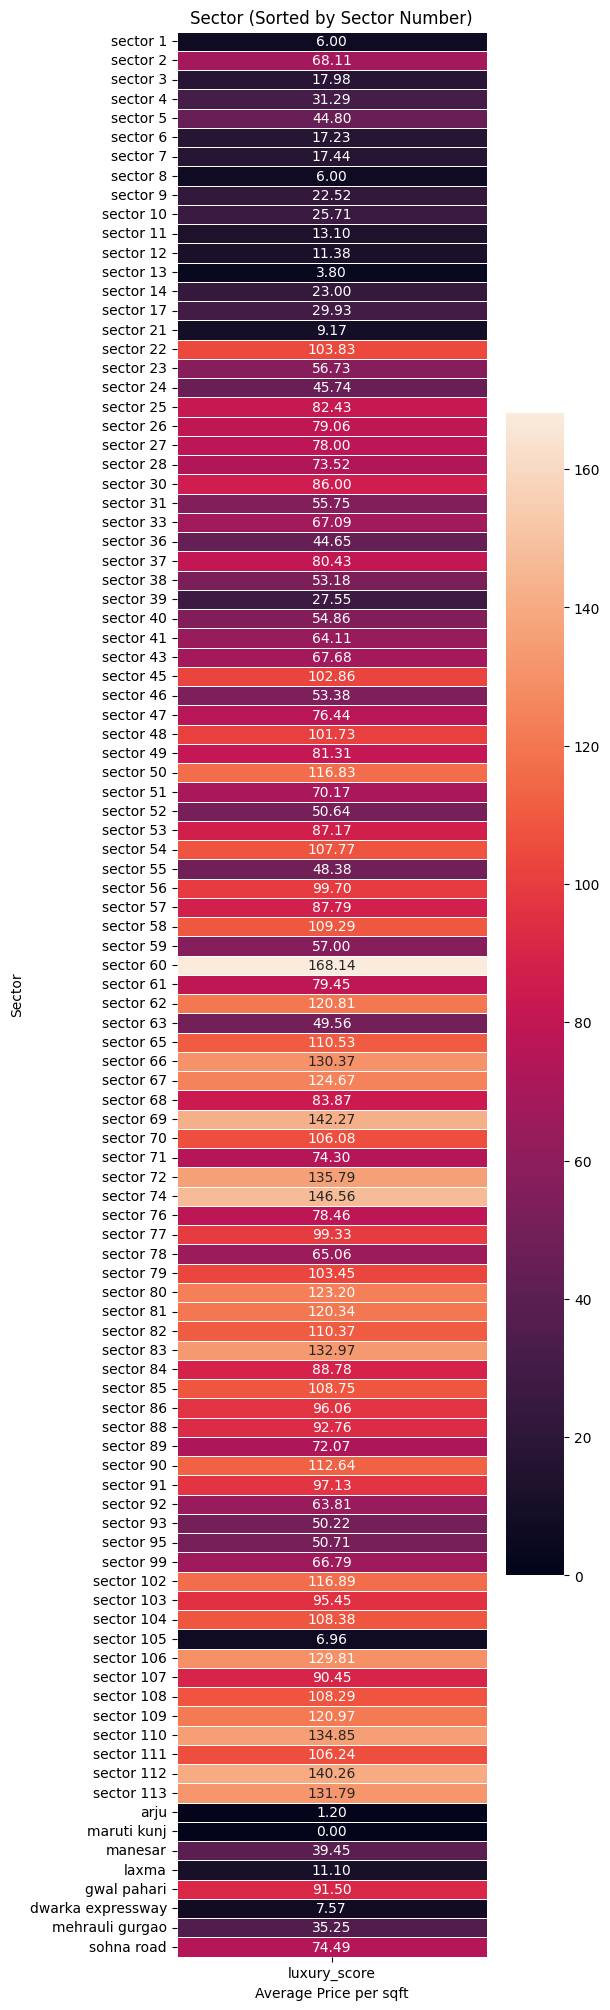

In [ ]:
# luxury Score vs Sector
luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

# Sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_score']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

## price

<Axes: xlabel='area', ylabel='price'>

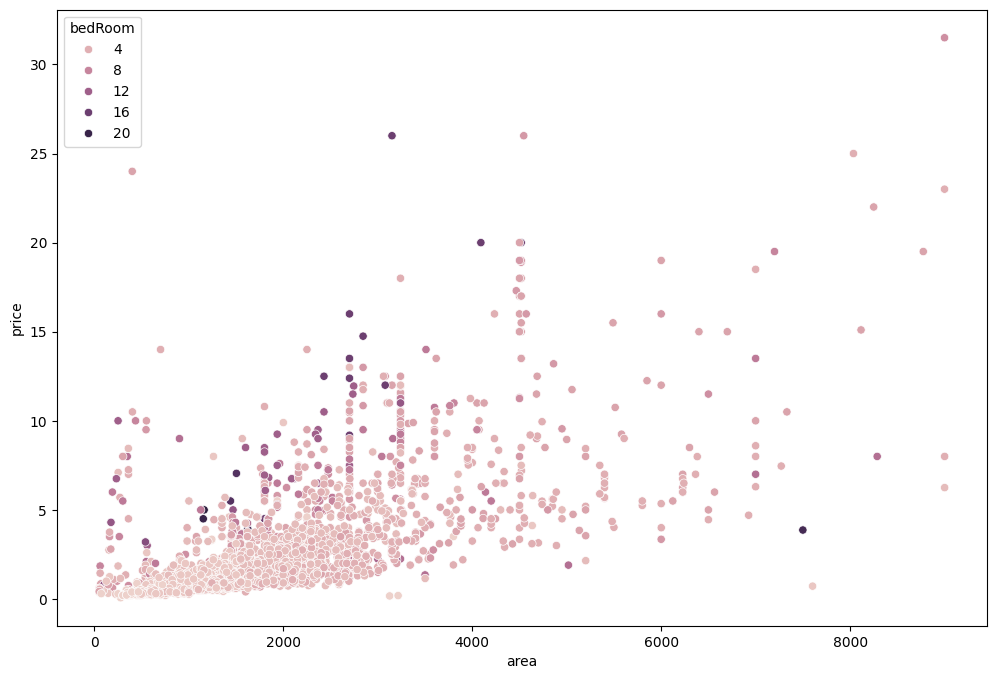

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df[df['area']<10000]['area'],y=df['price'],hue=df['bedRoom'])

<Axes: xlabel='area', ylabel='price'>

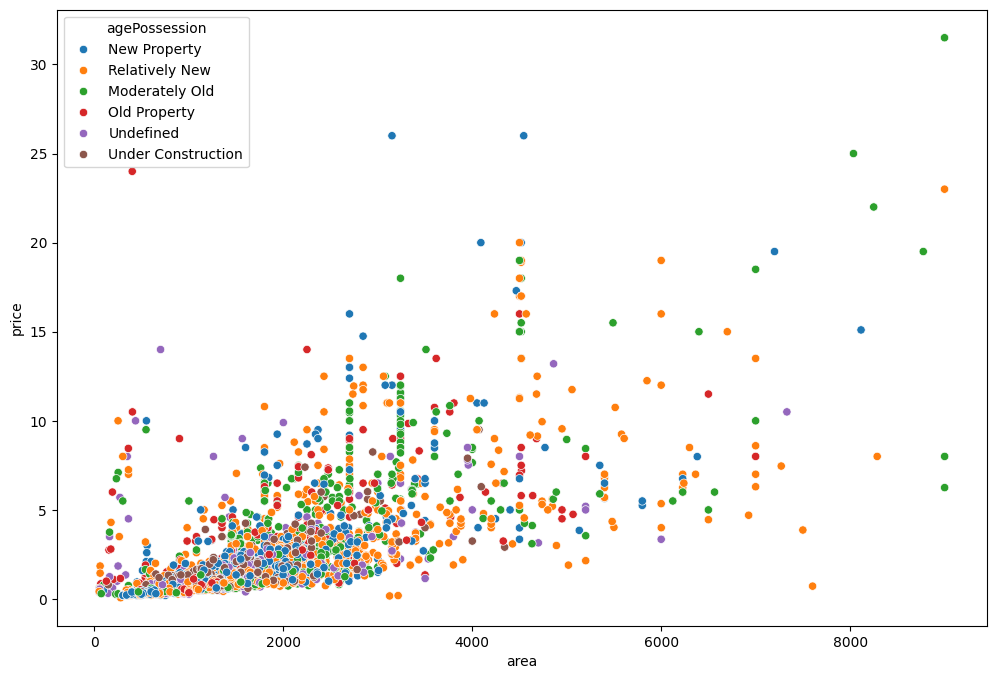

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df[df['area']<10000]['area'],y=df['price'],hue=df['agePossession'])


<Axes: xlabel='area', ylabel='price'>

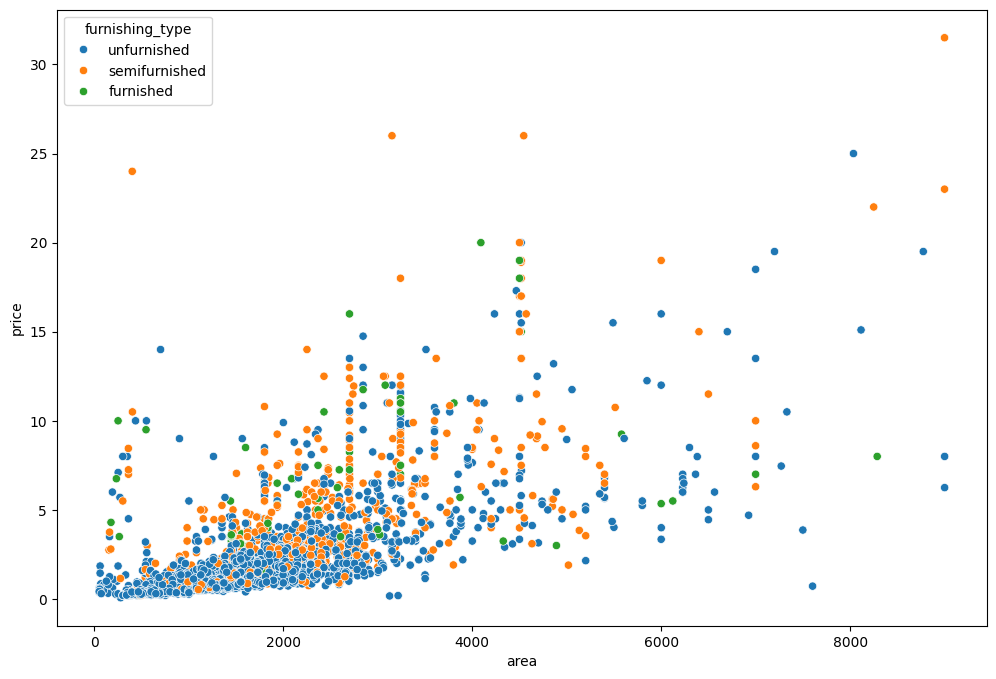

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df[df['area']<10000]['area'],y=df['price'],hue=df['furnishing_type'])


<Axes: xlabel='bedRoom', ylabel='price'>

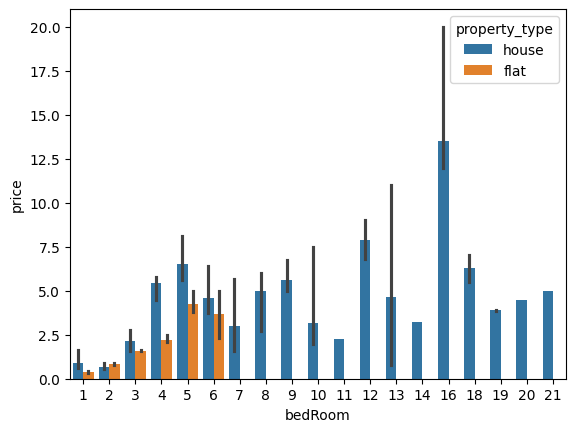

In [ ]:
sns.barplot(x=df['bedRoom'],y=df['price'],estimator=np.median,hue=df['property_type'])


<Axes: xlabel='bathroom', ylabel='price'>

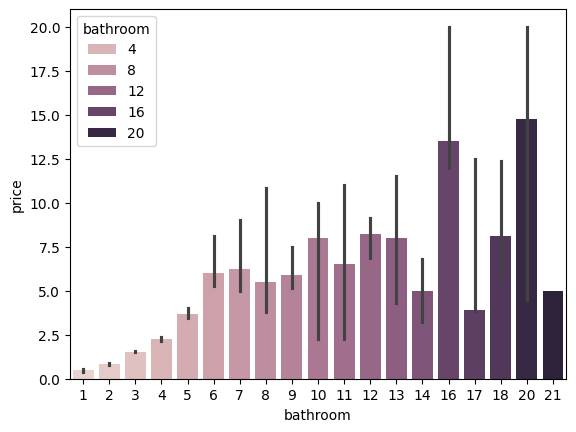

In [ ]:
sns.barplot(x=df['bathroom'],y=df['price'],estimator=np.median,hue=df['bathroom'])


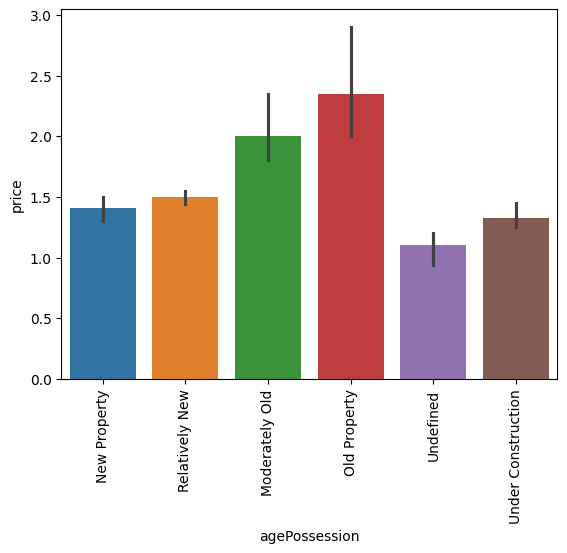

In [ ]:
sns.barplot(x=df['agePossession'],y=df['price'],estimator=np.median,hue=df['agePossession'])
plt.xticks(rotation='vertical')
plt.show()

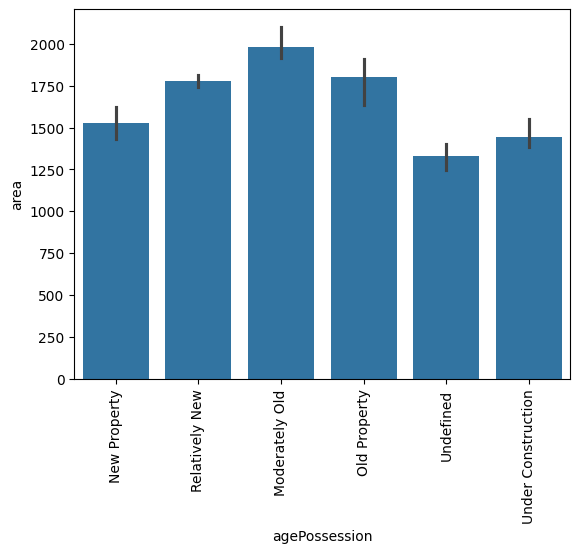

In [ ]:
sns.barplot(x=df['agePossession'],y=df['area'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

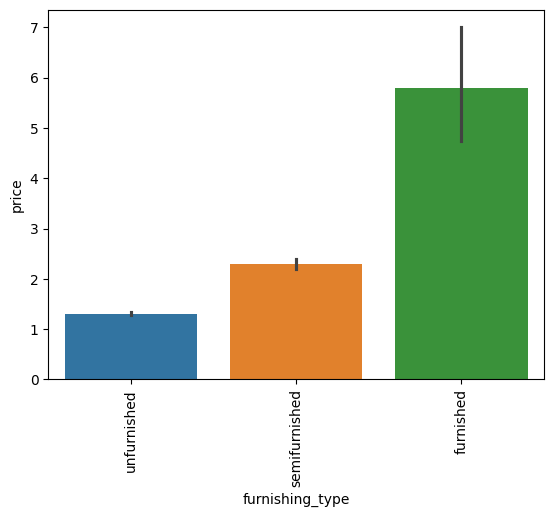

In [ ]:
sns.barplot(x=df['furnishing_type'],y=df['price'],estimator=np.median,hue=df['furnishing_type'])
plt.xticks(rotation='vertical')
plt.show()


<Axes: xlabel='luxury_score', ylabel='price'>

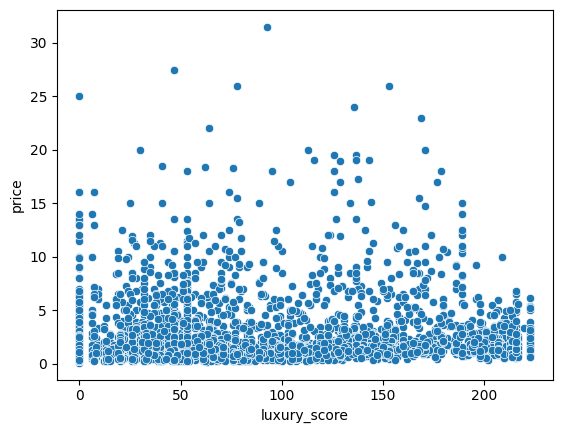

In [ ]:
sns.scatterplot(x=df['luxury_score'],y=df['price'])

## correlation

<Axes: >

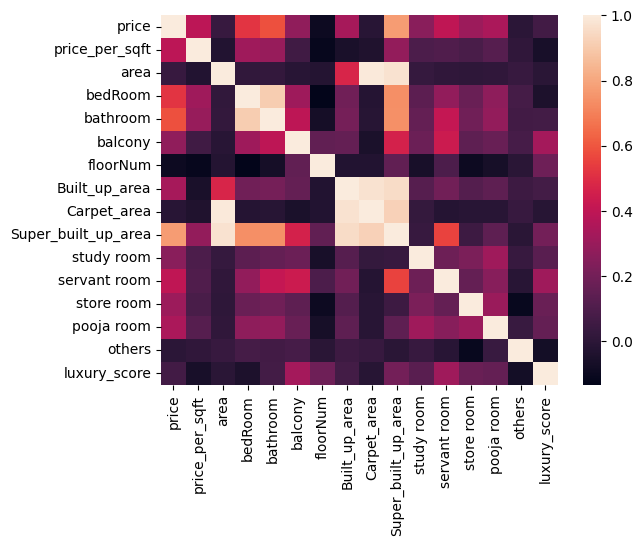

In [ ]:
numerical_df = df.select_dtypes(include='number')
sns.heatmap(numerical_df.corr())

In [ ]:
numerical_df.corr()['price'].sort_values(ascending=False)


price                  1.000000
Super_built_up_area    0.771352
bathroom               0.586327
bedRoom                0.520483
servant room           0.402066
price_per_sqft         0.392046
pooja room             0.344917
Built_up_area          0.335752
store room             0.307852
balcony                0.276951
study room             0.259992
luxury_score           0.062399
area                   0.033846
others                -0.001636
Carpet_area           -0.011519
floorNum              -0.097404
Name: price, dtype: float64

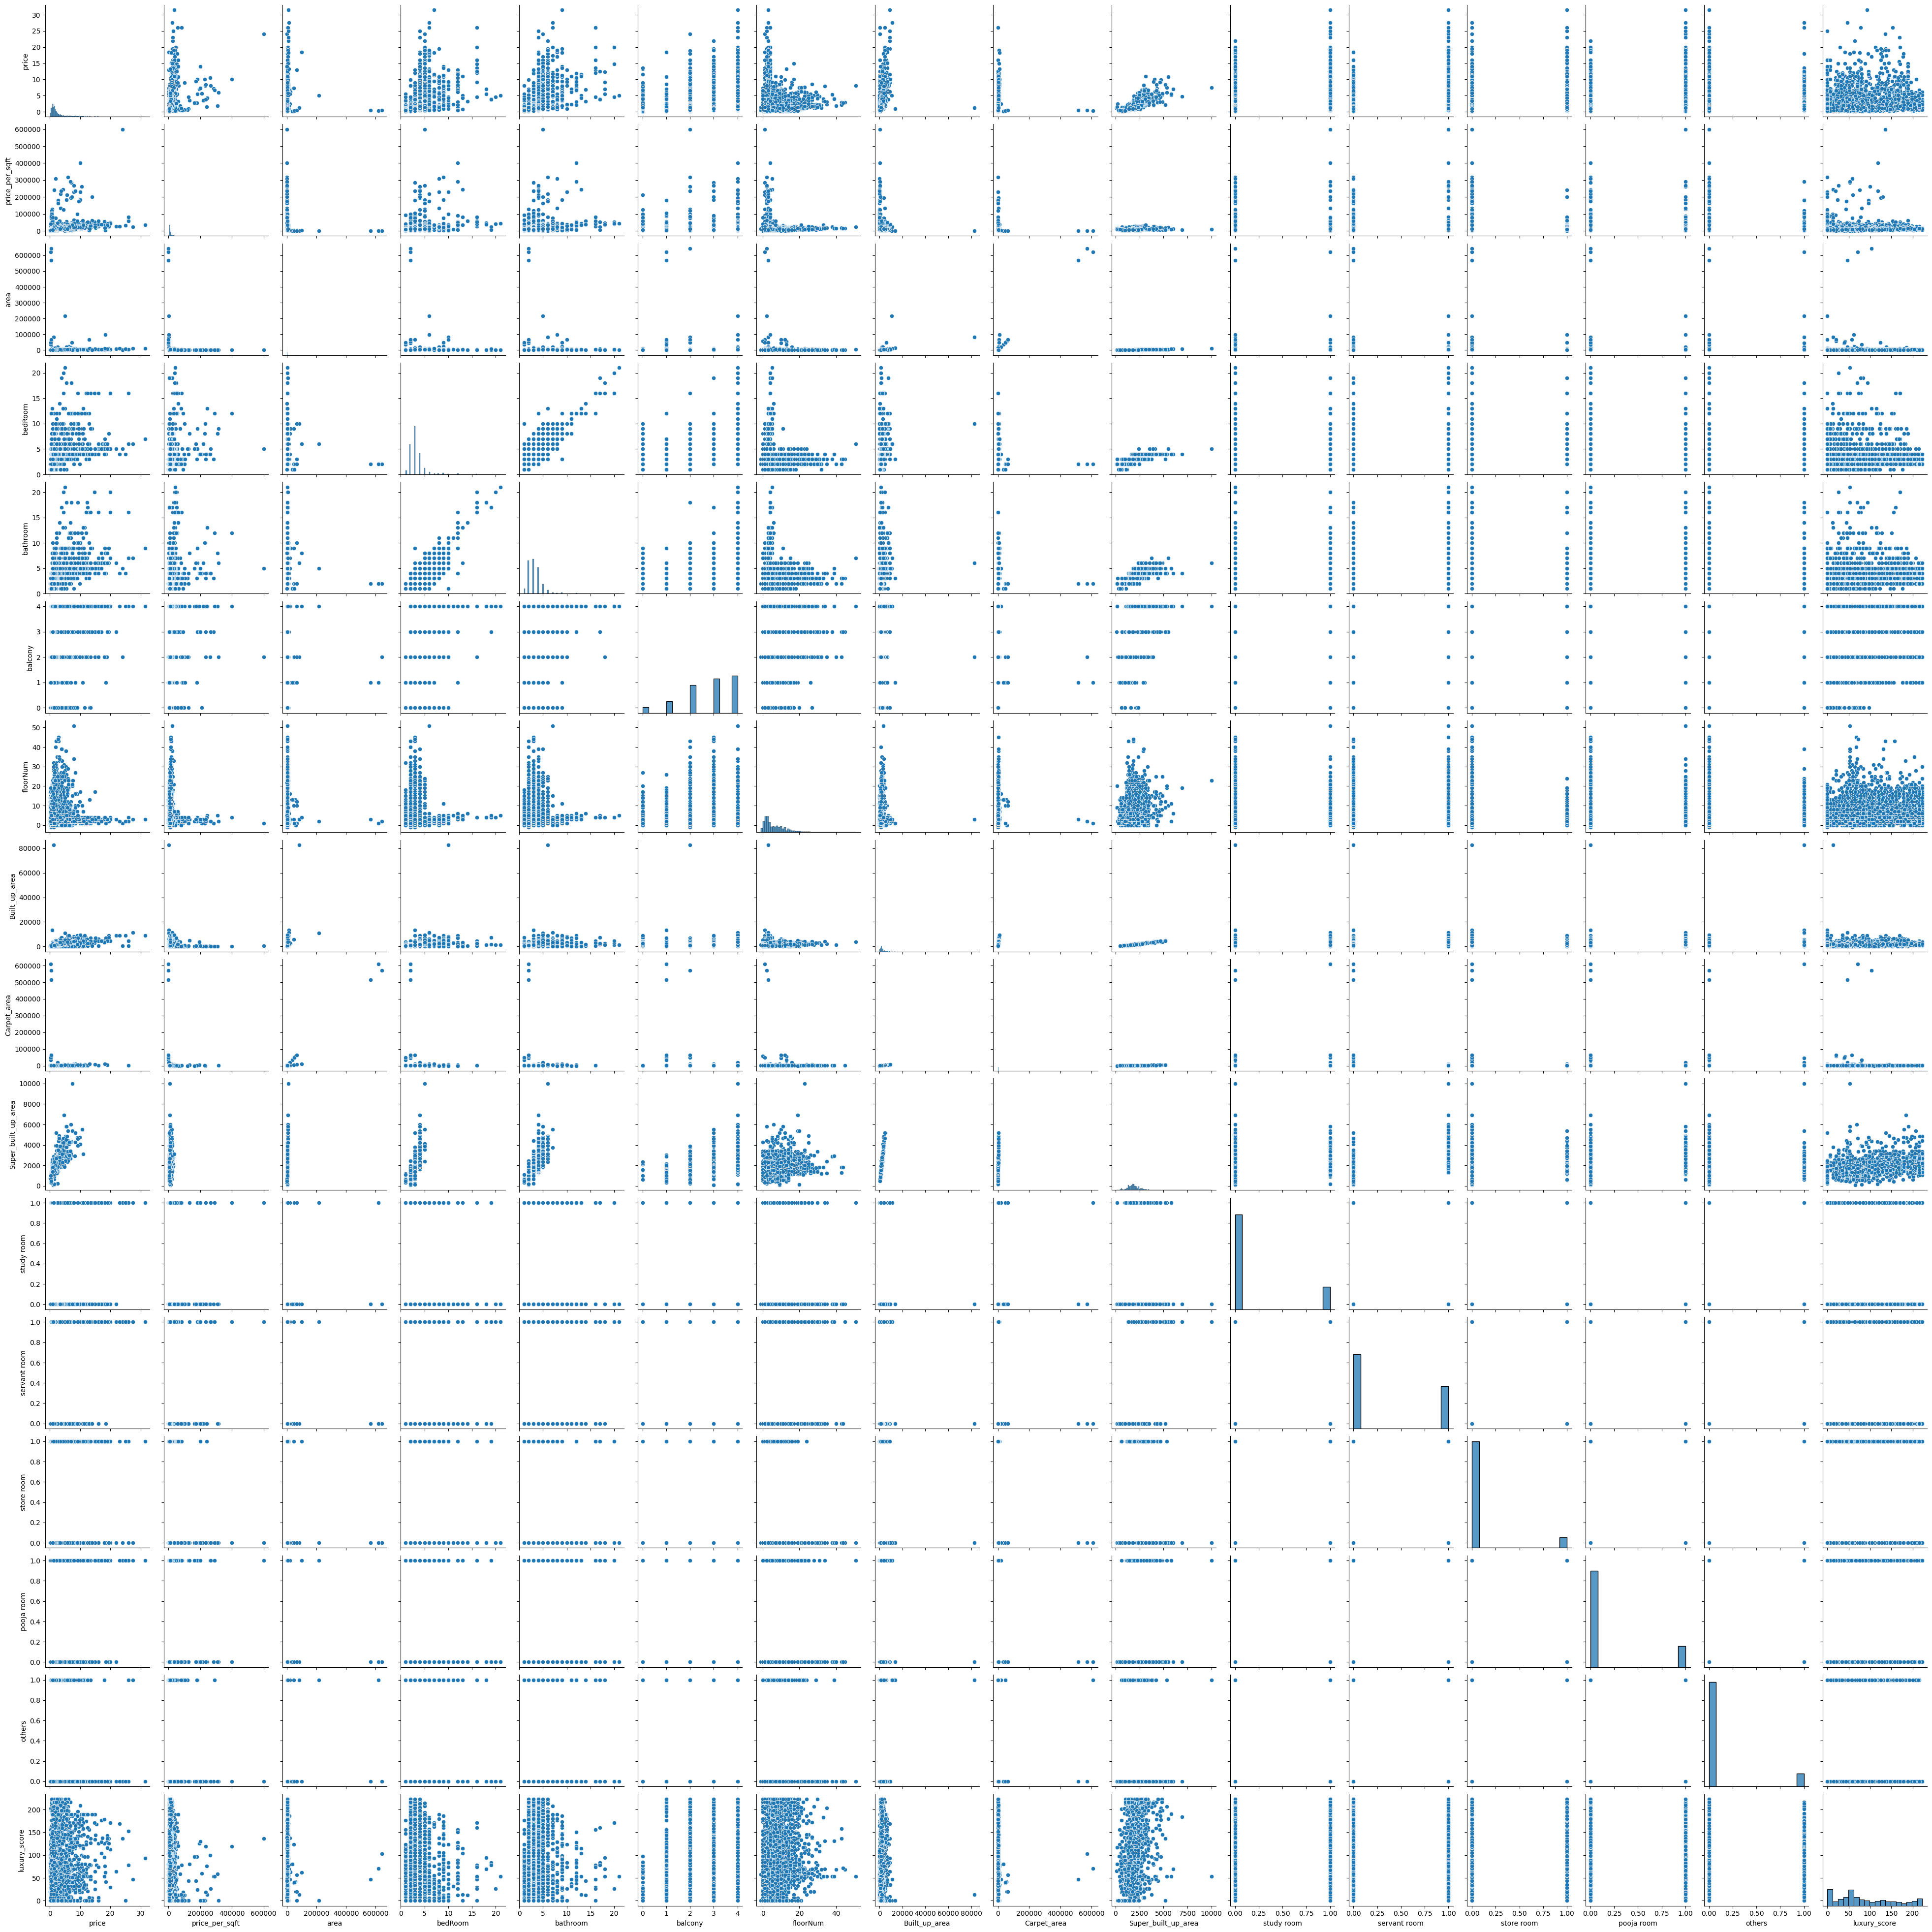

In [ ]:
sns.pairplot(df)
